PROJET C02 - Jonathan CHICHEPORTICHE / Jonathan LANGNER

Problématique : Quelles sont les caractéristiques qui favorisent les émissions de CO2 ?<br>
<br>Objectif 1 : Prédire la variable 'CO2' et les variables ayant une influence sur la valeur 'co2'.<br>
<br>Objectif 2 : Classer les véhicules par label d'émission ACRISS (A+...F)

Import des packages nécessaires au projet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import nbformat
from scipy.stats import pearsonr,f_oneway, kruskal
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, KFold
import collections
import tabulate
import os
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,OrdinalEncoder, FunctionTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn.datasets
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression
import plotly.figure_factory as ff
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
import pickle
import os
import warnings

c:\Users\J0348664\Downloads\DataScientest\Projet fin\projetCO2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Etape 1 : Contexte et appréhension du sujet

1.1 Charger les différentes sources de données et afficher quelques premières informations

In [2]:
# Charger les données de 2012 et 2015 (en spécifiant l'encodage)
df_2012 = pd.read_csv("2012.csv", sep=";", encoding="ISO-8859-1")
df_2013 = pd.read_csv("2013.csv", sep=";", encoding="ISO-8859-1")
df_2014 = pd.read_csv("2014.csv", sep=";", encoding="ISO-8859-1")
df_2015 = pd.read_csv("2015.csv", sep=";", encoding="ISO-8859-1")

In [3]:
#Aperçu des informations pour le dataframe 2012(inclus de facto l'attribut 'shape'
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40052 entries, 0 to 40051
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            40052 non-null  object 
 1   lib_mod_doss       40052 non-null  object 
 2   lib_mod            40052 non-null  object 
 3   cnit               40052 non-null  object 
 4   dscom              40052 non-null  object 
 5   tvv                40052 non-null  object 
 6   typ_cbr            40052 non-null  object 
 7   hybride            40052 non-null  object 
 8   puiss_admin_98     40052 non-null  int64  
 9   puiss_max          40052 non-null  int64  
 10  typ_boite_nb_rapp  40052 non-null  object 
 11  conso_urb          40020 non-null  object 
 12  conso_exurb        40020 non-null  object 
 13  conso_mixte        40022 non-null  object 
 14  co2                40022 non-null  float64
 15  co_typ_1           39905 non-null  object 
 16  hc                 835

In [4]:
#Aperçu des informations pour le dataframe 2013 (inclus de facto l'attribut 'shape'
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44850 entries, 0 to 44849
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44850 non-null  object 
 1   Modèle dossier                        44850 non-null  object 
 2   Modèle UTAC                           44850 non-null  object 
 3   Désignation commerciale               44850 non-null  object 
 4   CNIT                                  44850 non-null  object 
 5   Type Variante Version (TVV)           44850 non-null  object 
 6   Carburant                             44850 non-null  object 
 7   Hybride                               44850 non-null  object 
 8   Puissance administrative              44850 non-null  int64  
 9   Puissance maximale (kW)               44850 non-null  float64
 10  Boîte de vitesse                      44850 non-null  object 
 11  Consommation ur

In [5]:
#Aperçu des informations pour le dataframe 2014(inclus de facto l'attribut 'shape'
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            55044 non-null  object 
 1   lib_mod_doss       55044 non-null  object 
 2   lib_mod            55044 non-null  object 
 3   dscom              55044 non-null  object 
 4   cnit               55044 non-null  object 
 5   tvv                55044 non-null  object 
 6   cod_cbr            55044 non-null  object 
 7   hybride            55044 non-null  object 
 8   puiss_admin_98     55044 non-null  int64  
 9   puiss_max          55044 non-null  object 
 10  typ_boite_nb_rapp  55044 non-null  object 
 11  conso_urb          55001 non-null  object 
 12  conso_exurb        55001 non-null  object 
 13  conso_mixte        55010 non-null  object 
 14  co2                55010 non-null  float64
 15  co_typ_1           54886 non-null  object 
 16  hc                 977

In [6]:
#Aperçu des informations pour le dataframe 2015 (inclus de facto l'attribut 'shape'
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20880 entries, 0 to 20879
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq_doss       20880 non-null  object 
 1   lib_mod_doss       20880 non-null  object 
 2   mrq_utac           20880 non-null  object 
 3   mod_utac           20880 non-null  object 
 4   cnit               20880 non-null  object 
 5   dscom              20880 non-null  object 
 6   tvv                20880 non-null  object 
 7   energ              20880 non-null  object 
 8   hybride            20880 non-null  object 
 9   puiss_admin        20880 non-null  int64  
 10  puiss_max          20824 non-null  float64
 11  puiss_heure        895 non-null    float64
 12  typ_boite_nb_rapp  20880 non-null  object 
 13  conso_urb_93       20759 non-null  float64
 14  conso_exurb        20759 non-null  float64
 15  conso_mixte        20824 non-null  float64
 16  co2_mixte          208

1.2 Analyses exploratoires

Identifier les données nécessaires, comprendre leur structure, et déterminer comment elles peuvent être utilisées pour atteindre les objectifs fixés.

In [7]:
# Afficher des statistiques descriptives pour les variables numériques
display("Statistiques descriptives 2012 :", df_2012.describe())
display("Statistiques descriptives 2013 :", df_2013.describe())
display("Statistiques descriptives 2014 :", df_2014.describe())
display("Statistiques descriptives 2015 :", df_2015.describe())

'Statistiques descriptives 2012 :'

puiss_admin_98     puiss_max           co2  masse_ordma_min  \
count    40052.000000  40052.000000  40022.000000     40052.000000   
mean        10.911590    122.643339    204.008920      2106.085314   
std          5.207895     45.563309     36.249836       324.355597   
min          1.000000     10.000000     27.000000       825.000000   
25%          9.000000    100.000000    192.000000      1985.000000   
50%         10.000000    120.000000    208.000000      2076.000000   
75%         11.000000    120.000000    222.000000      2356.000000   
max         81.000000    559.000000    572.000000      3115.000000   

       masse_ordma_max  date_maj  
count     40052.000000       0.0  
mean       2212.432962       NaN  
std         389.339797       NaN  
min         825.000000       NaN  
25%        2075.000000       NaN  
50%        2185.000000       NaN  
75%        2450.000000       NaN  
max        3115.000000       NaN

'Statistiques descriptives 2013 :'

Puissance administrative  Puissance maximale (kW)  \
count              44850.000000             44850.000000   
mean                  11.018997               124.780834   
std                    5.554475                49.158804   
min                    1.000000                10.000000   
25%                    9.000000               100.000000   
50%                   10.000000               120.000000   
75%                   11.000000               125.000000   
max                   81.000000               559.300000   

       Consommation urbaine (l/100km)  Consommation extra-urbaine (l/100km)  \
count                    44808.000000                          44808.000000   
mean                         9.706744                              6.567634   
std                          2.366181                              1.196234   
min                          0.000000                              2.800000   
25%                          8.800000                              6.300000   
50%                          9.800000                              6.700000   
75%                         10.700000                              7.100000   
max                         41.100000                             14.900000   

       Consommation mixte (l/100km)    CO2 (g/km)  CO type I (g/km)  \
count                  44811.000000  44811.000000      44547.000000   
mean                       7.716254    198.910892          0.153461   
std                        1.597110     39.014678          0.138984   
min                        1.200000     27.000000          0.005000   
25%                        7.200000    187.000000          0.046000   
50%                        7.700000    203.000000          0.093000   
75%                        8.400000    221.000000          0.222000   
max                       24.500000    572.000000          0.968000   

          HC (g/km)    NOX (g/km)  HC+NOX (g/km)  Particules (g/km)  \
count  10403.000000  44547.000000   34191.000000       41708.000000   
mean       0.030499      0.311837       0.224788           0.000961   
std        0.018408      0.463112       0.041681           0.006469   
min        0.008000      0.001000       0.038000           0.000000   
25%        0.008000      0.158000       0.201000           0.000000   
50%        0.031000      0.197000       0.220000           0.001000   
75%        0.044000      0.228000       0.248000           0.001000   
max        0.143000      1.846000       0.306000           0.610000   

       masse vide euro min (kg)  masse vide euro max (kg)  
count              44850.000000              44850.000000  
mean                2070.961650               2169.545284  
std                  342.872975                410.600541  
min                  825.000000                825.000000  
25%                 1976.000000               2043.500000  
50%                 2076.000000               2185.000000  
75%                 2256.000000               2355.000000  
max                 3115.000000               3115.000000

'Statistiques descriptives 2014 :'

puiss_admin_98           co2  masse_ordma_min  masse_ordma_max
count    55044.000000  55010.000000     55044.000000     55044.000000
mean        10.551504    201.707035      2102.104553      2341.021801
std          5.126021     33.976278       294.731715       424.067895
min          1.000000     13.000000       825.000000       825.000000
25%          9.000000    193.000000      1982.000000      2075.000000
50%         10.000000    205.000000      2076.000000      2355.000000
75%         10.000000    216.000000      2246.000000      2709.000000
max         81.000000    572.000000      2760.000000      3094.000000

'Statistiques descriptives 2015 :'

puiss_admin     puiss_max  puiss_heure  conso_urb_93   conso_exurb  \
count  20880.000000  20824.000000   895.000000  20759.000000  20759.000000   
mean      12.390134    146.085315    32.630726      7.743307      5.348755   
std        9.751439     80.113755    16.984350      2.957154      1.389960   
min        1.000000     28.000000     0.500000      0.000000      2.600000   
25%        8.000000    100.000000    20.000000      5.800000      4.300000   
50%        9.000000    120.000000    20.000000      7.100000      5.200000   
75%       12.000000    150.000000    48.000000      8.600000      6.200000   
max       80.000000    585.000000    85.000000     27.300000     13.700000   

        conso_mixte     co2_mixte      co_typ_1           hc           nox  \
count  20824.000000  20824.000000  20605.000000  8897.000000  20605.000000   
mean       6.216246    154.584326      0.256855     0.042104      0.093032   
std        1.926168     44.247481      0.119007     0.012890      0.085165   
min        0.600000     13.000000      0.000000     0.000000      0.000000   
25%        4.800000    122.000000      0.177000     0.033000      0.030000   
50%        5.800000    147.000000      0.249000     0.042000      0.056000   
75%        7.100000    180.000000      0.308000     0.051000      0.160000   
max       17.200000    398.000000      0.968000     0.084000      0.317000   

              hcnox          ptcl  masse_ordma_min  masse_ordma_max  
count  11735.000000  19170.000000     20880.000000     20880.000000  
mean       0.142602      0.000699      1810.563649      1846.491140  
std        0.072383      0.000958       371.924329       429.122546  
min        0.000000      0.000000       875.000000       875.000000  
25%        0.077000      0.000000      1505.000000      1505.750000  
50%        0.117000      0.000000      1760.000000      1760.000000  
75%        0.213000      0.001000      2050.000000      2050.000000  
max        0.301000      0.004000      2765.000000      3084.000000

In [8]:
#Analyse de combien de valeurs uniques (cardinalité) : .nunique
dataframes = [df_2012, df_2013, df_2014, df_2015]
resultats = []

for i, df in enumerate(dataframes):
    for nom_colonne in df.columns:
        nombre_uniques = df[nom_colonne].nunique()
        resultats.append({
            'DataFrame': 2012 + i,
            'Colonne': nom_colonne,
            'Nombre de valeurs uniques': nombre_uniques
        })

df_recap_nunique = pd.DataFrame(resultats)
print(df_recap_nunique)

     DataFrame          Colonne  Nombre de valeurs uniques
0         2012          lib_mrq                         49
1         2012     lib_mod_doss                        409
2         2012          lib_mod                        384
3         2012             cnit                      39593
4         2012            dscom                       3192
..         ...              ...                        ...
99        2015             ptcl                          5
100       2015  masse_ordma_min                        799
101       2015  masse_ordma_max                        830
102       2015         champ_v9                         15
103       2015         date_maj                          4

[104 rows x 3 columns]


In [9]:
#Analyse de la fréquence de chaque valeur unique pour toutes les colonnes des DataFrames:(distribution)? : .value_counts()
def generer_dataframe_recapitulatif_value_counts(dataframes, annees):
    resultats = []

    for i, df in enumerate(dataframes):
        annee = annees[i]
        for nom_colonne in df.columns:
            # Calculer les value_counts() pour la colonne
            value_counts = df[nom_colonne].value_counts()

            # Ajouter les résultats à la liste
            for valeur, frequence in value_counts.items():
                resultats.append({
                    'DataFrame': annee,
                    'Colonne': nom_colonne,
                    'Valeur': valeur,
                    'Fréquence': frequence
                })

    df_recap = pd.DataFrame(resultats)
    return df_recap

dataframes = [df_2012, df_2013, df_2014, df_2015]
annees = [2012, 2013, 2014, 2015]

df_resultat = generer_dataframe_recapitulatif_value_counts(dataframes, annees)
print(df_resultat)

        DataFrame   Colonne                   Valeur  Fréquence
0            2012   lib_mrq            MERCEDES-BENZ      34924
1            2012   lib_mrq                      BMW        596
2            2012   lib_mrq                     OPEL        503
3            2012   lib_mrq                    SKODA        395
4            2012   lib_mrq               VOLKSWAGEN        304
...           ...       ...                      ...        ...
301743       2015  champ_v9  715/2007*143/2013EURO6           2
301744       2015  date_maj                  mars-15      19940
301745       2015  date_maj                  juin-14        718
301746       2015  date_maj                   déc-14        201
301747       2015  date_maj                  juin-13         21

[301748 rows x 4 columns]


1.3 Data visualisation pour la compréhension des données

In [10]:
# 1. Graphe pour affiche la cardinalité par colonne et par année (plotly)

annees = [2012, 2013, 2014, 2015]
fig = make_subplots(rows=2, cols=2, subplot_titles=[f'{annee}' for annee in annees])

for i, annee in enumerate(annees):
    data_annee = df_recap_nunique[df_recap_nunique['DataFrame'] == annee]

    # Calcul de l'index de ligne et de colonne pour le subplot
    row = (i // 2) + 1
    col = (i % 2) + 1

    fig.add_trace(go.Bar(
        x=data_annee['Colonne'],
        y=data_annee['Nombre de valeurs uniques'],
        name=str(annee),  # Utilisation de l'année comme traceur
        showlegend=False # Masquer la légende
    ), row=row, col=col)


    fig.update_xaxes(
        tickangle=-45,
        tickmode="array",
        tickvals=data_annee['Colonne'],
        ticktext=data_annee['Colonne'],
        row=row, col=col
    )

    fig.update_yaxes(
        nticks=5,
        row=row, col=col
    )

fig.update_layout(
    height=1100,
    width=1200,
    title_text="Cardinalité des colonnes par année (nb valeurs uniques)",
    title_x=0.5,

)

fig.show()

print ("Analyse: La variable cnit ressort dans chaque data frame. Chaque numero cnit est different en fonction du modele.")

Analyse: La variable cnit ressort dans chaque data frame. Chaque numero cnit est different en fonction du modele.


Etape 2 : Preprocessing

2.1 Nettoyage des données

In [11]:
#On utilise une boucle pour effecturer des opérations de vérification, suppression et réindexation des doublons sur chacun des dataframes (important sinon la concaténation ne fonctionnera pas)

noms_dfs = ["df_2012", "df_2013", "df_2014", "df_2015"]  # Pour des messages plus clairs

for i, df in enumerate(dataframes):
    nom_df = noms_dfs[i]
    print(f"Vérification des doublons pour {nom_df}:")
    print(df.duplicated(), end='\n\n')  # Afficher les lignes dupliquées

    longueur_initiale = len(df)
    nb_lignes_dupliquees = df.duplicated().sum()
    print(f"Nombre de lignes en doublon dans {nom_df}: {nb_lignes_dupliquees}")

    df.drop_duplicates(inplace=True)  # Suppression des doublons
    longueur_finale = len(df)
    print(f"Nombre de lignes supprimées pour {nom_df}: {longueur_initiale - longueur_finale}")

    df.reset_index(drop=True, inplace=True)  # Réindexation
    print(f"Réindexation de {nom_df} effectuée.\n")


    

Vérification des doublons pour df_2012:
0        False
1        False
2        False
3        False
4        False
         ...  
40047    False
40048    False
40049    False
40050    False
40051    False
Length: 40052, dtype: bool

Nombre de lignes en doublon dans df_2012: 420
Nombre de lignes supprimées pour df_2012: 420
Réindexation de df_2012 effectuée.

Vérification des doublons pour df_2013:
0        False
1        False
2        False
3        False
4        False
         ...  
44845    False
44846    False
44847    False
44848    False
44849    False
Length: 44850, dtype: bool

Nombre de lignes en doublon dans df_2013: 619
Nombre de lignes supprimées pour df_2013: 619
Réindexation de df_2013 effectuée.

Vérification des doublons pour df_2014:
0        False
1        False
2        False
3        False
4        False
         ...  
55039    False
55040    False
55041    False
55042    False
55043    False
Length: 55044, dtype: bool

Nombre de lignes en doublon dans df_2014: 7
N

In [12]:
df_2015["Carrosserie"] = np.nan
df_2015["gamme"] = np.nan


In [13]:
#Création d'une colonne 'année' (indiquant l'année du dataframe) pour chaque dataframes
df_2012["année"] = 2012
df_2013["année"] = 2013
df_2014["année"] = 2014
df_2015["année"] = 2015

In [14]:
# Uniformisation des noms des colonnes basé sur le mapping ci-dessous pour df_2012, df_2014, df_2015.
column_mapping = {
    "Boîte de vitesse": "typ_boite_nb_rapp",
    "Carburant": "typ_crb",
    "Carrosserie": "Carrosserie",
    "Champ V9": "champ_v9",
    "CNIT" : "cnit",
    "CO type I (g/km)": "co_typ_1",
    "co_typ_1": "co_typ_1",
    "CO2 (g/km)": "co2",
    "co2": "co2",
    "co2_mixte": "co2",
    "cod_cbr": "typ_crb",
    "conso_urb_93": "conso_urb",
    "Consommation extra-urbaine (l/100km)": "conso_exurb",
    "Consommation mixte (l/100km)": "conso_mixte",
    "Consommation urbaine (l/100km)": "conso_urb",
    "Date de mise à jour": "date_maj",
    "Désignation commerciale": "dscom",
    "dscom": "dscom",
    "energ": "typ_crb",
    "HC (g/km)": "hc",
    "HC+NOX (g/km)": "hcnox",
    "hibride": "hybride",
    "Hybride" : "hybride",
    "lib_mod": "lib_mod",
    "lib_mrq": "lib_mrq_utac",
    "lib_mrq_doss": "lib_mrq_utac",
    "Marque": "lib_mrq_utac",
    "masse vide euro max (kg)": "masse_ordma_max",
    "masse vide euro min (kg)": "masse_ordma_min",
    "mod_utac": "lib_mod",
    "Modèle dossier": "lib_mod_doss",
    "Modèle UTAC": "lib_mod",
    "mrq_utac": "lib_mrq_utac",
    "NOX (g/km)": "nox",
    "Particules (g/km)": "ptcl",
    "puiss_admin_98": "puiss_admin",
    "puiss_heure": "puiss_h",
    "Puissance administrative": "puiss_admin",
    "Puissance maximale (kW)": "puiss_max",
    "typ_cbr": "typ_crb",
    "typ-crb" : "typ_crb",
    "Type Variante Version (TVV)": "tvv",
}

dataframes = {"df_2012": df_2012,"df_2013": df_2013, "df_2014": df_2014, "df_2015": df_2015}

def standardize_column_names(df, column_mapping):
    df = df.copy()

    new_columns = df.columns.to_list()
    for keys, new_name in column_mapping.items():
        if isinstance(keys, str):
            keys = [keys]
        for key in keys:
            if key in new_columns:
                new_columns[new_columns.index(key)] = new_name
    df.columns = new_columns
    return df

# On applique la fonction sur chaque dataframe
for df_name, df in dataframes.items():
    dataframes[df_name] = standardize_column_names(df, column_mapping)

# On modifie les dataframes originaux directement
df_2012 = dataframes["df_2012"]
df_2013 = dataframes["df_2013"]
df_2014 = dataframes["df_2014"]
df_2015 = dataframes["df_2015"]

In [15]:
#On ordonne l'ordre des en-têtes par ordre alphabétique pour chacun des dataframes

def ordonner_colonnes_alphabetiquement(df):
    try:
        colonnes_ordonnees = sorted(df.columns)
        df_ordonne = df[colonnes_ordonnees]
        return df_ordonne
    except Exception as e:
        print(f"Erreur : {e}")
        return None

dataframes = [df_2012, df_2013, df_2014, df_2015]

for i, df in enumerate(dataframes):
    dataframes[i] = ordonner_colonnes_alphabetiquement(df)

df_2012 = dataframes[0]
df_2013 = dataframes[1]
df_2014 = dataframes[2]
df_2015 = dataframes[3]

In [16]:
#Vérification des labels de colonnes pour chaque dataframe.
print("Colonnes df_2012:", set(df_2012.columns))
print("Colonnes df_2013:", set(df_2013.columns))
print("Colonnes df_2014:", set(df_2014.columns))
print("Colonnes df_2015:", set(df_2015.columns))

Colonnes df_2012: {'typ_boite_nb_rapp', 'conso_exurb', 'masse_ordma_max', 'nox', 'lib_mod', 'conso_urb', 'conso_mixte', 'puiss_max', 'champ_v9', 'gamme', 'typ_crb', 'tvv', 'date_maj', 'Carrosserie', 'masse_ordma_min', 'lib_mod_doss', 'puiss_admin', 'dscom', 'lib_mrq_utac', 'année', 'hybride', 'cnit', 'co2', 'co_typ_1', 'hcnox', 'ptcl', 'hc'}
Colonnes df_2013: {'typ_boite_nb_rapp', 'conso_exurb', 'masse_ordma_max', 'nox', 'lib_mod', 'conso_urb', 'conso_mixte', 'puiss_max', 'champ_v9', 'gamme', 'typ_crb', 'tvv', 'date_maj', 'Carrosserie', 'masse_ordma_min', 'lib_mod_doss', 'puiss_admin', 'dscom', 'lib_mrq_utac', 'année', 'hybride', 'cnit', 'co2', 'co_typ_1', 'hcnox', 'ptcl', 'hc'}
Colonnes df_2014: {'typ_boite_nb_rapp', 'conso_exurb', 'masse_ordma_max', 'nox', 'lib_mod', 'conso_urb', 'conso_mixte', 'puiss_max', 'champ_v9', 'gamme', 'typ_crb', 'tvv', 'date_maj', 'Carrosserie', 'masse_ordma_min', 'lib_mod_doss', 'puiss_admin', 'dscom', 'lib_mrq_utac', 'année', 'hybride', 'cnit', 'co2', 'co

In [17]:
#Vérification de l'uniformité des colonnes avant concaténation en un dataframe final

# Convertir les colonnes en ensembles
set_2012 = set(df_2012.columns)
set_2013 = set(df_2013.columns)
set_2014 = set(df_2014.columns)
set_2015 = set(df_2015.columns)

# Trouver les différences et afficher le(s) colonne(s) supplémentaire(s)
def afficher_differences(ensemble1, ensemble2, nom1, nom2):
    differences = ensemble1.symmetric_difference(ensemble2)
    if differences:
        print(f"Différences entre {nom1} et {nom2}: {differences}")
    else:
        print(f"Pas de différences entre {nom1} et {nom2}")

afficher_differences(set_2012, set_2013, "2012", "2013")
afficher_differences(set_2012, set_2014, "2012", "2014")
afficher_differences(set_2012, set_2015, "2012", "2015")
if set_2012 == set_2013 == set_2014 == set_2015:
    print("Toutes les colonnes sont maintenant alignées. Fusion possible !")
else:
    print("Problème détecté, revérifiez les différences.")

Pas de différences entre 2012 et 2013
Pas de différences entre 2012 et 2014
Différences entre 2012 et 2015: {'puiss_h'}
Problème détecté, revérifiez les différences.


In [18]:
#Suppression de la colonne supplémentaire dans df_2015('puiss_h')
df_2015 = df_2015.copy()
df_2015.drop(columns=["puiss_h"], inplace=True)

In [19]:
##Validation de la conformité une nouvelle fois avant concaténation en un dataframe final

# Convertir les colonnes en ensembles
set_2012 = set(df_2012.columns)
set_2013 = set(df_2013.columns)
set_2014 = set(df_2014.columns)
set_2015 = set(df_2015.columns)

# Trouver les différences et afficher le(s) colonne(s) supplémentaire(s)
def afficher_differences(ensemble1, ensemble2, nom1, nom2):
    differences = ensemble1.symmetric_difference(ensemble2)
    if differences:
        print(f"Différences entre {nom1} et {nom2}: {differences}")
    else:
        print(f"Pas de différences entre {nom1} et {nom2}")

afficher_differences(set_2012, set_2013, "2012", "2013")
afficher_differences(set_2012, set_2014, "2012", "2014")
afficher_differences(set_2012, set_2015, "2012", "2015")
if set_2012 == set_2013 == set_2014 == set_2015:
    print("Toutes les colonnes sont maintenant alignées. Fusion possible !")
else:
    print("Problème détecté, revérifiez les différences.")

Pas de différences entre 2012 et 2013
Pas de différences entre 2012 et 2014
Pas de différences entre 2012 et 2015
Toutes les colonnes sont maintenant alignées. Fusion possible !


In [20]:
#On vérifie s'il y a des doublons de colonnes dans chacun des dataframes
def trouver_doublons(df, nom_df):
    colonnes_dupliquees = df.columns[df.columns.duplicated()].tolist()
    if colonnes_dupliquees:
        print(f"Colonnes dupliquées dans {nom_df}: {colonnes_dupliquees}")
    else:
        print(f"Aucune colonne dupliquée dans {nom_df}")

trouver_doublons(df_2012, "df_2012")
trouver_doublons(df_2013, "df_2013")
trouver_doublons(df_2014, "df_2014")
trouver_doublons(df_2015, "df_2015")

Aucune colonne dupliquée dans df_2012
Aucune colonne dupliquée dans df_2013
Aucune colonne dupliquée dans df_2014
Colonnes dupliquées dans df_2015: ['lib_mrq_utac', 'lib_mrq_utac', 'lib_mrq_utac']


In [21]:
#Suppression des doublons de df_2015, inplace=False
df_2015 = df_2015.loc[:, ~df_2015.columns.duplicated()]

In [22]:
#On crée le dataframe final sans traitement des variables (concaténation des 4 dataframes)
df_final = pd.concat([df_2012, df_2013, df_2014, df_2015], ignore_index=True)

In [23]:
#On affiche la structure de df_final et les informations du nouveau dataframe concanténé 'df_final'
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159780 entries, 0 to 159779
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Carrosserie        138900 non-null  object 
 1   année              159780 non-null  int64  
 2   champ_v9           159595 non-null  object 
 3   cnit               159780 non-null  object 
 4   co2                159622 non-null  float64
 5   co_typ_1           159090 non-null  object 
 6   conso_exurb        159543 non-null  object 
 7   conso_mixte        159622 non-null  object 
 8   conso_urb          159543 non-null  object 
 9   date_maj           68352 non-null   object 
 10  dscom              159780 non-null  object 
 11  gamme              138900 non-null  object 
 12  hc                 36813 non-null   object 
 13  hcnox              122452 non-null  object 
 14  hybride            159780 non-null  object 
 15  lib_mod            159780 non-null  object 
 16  li

In [24]:
#On affiche les statistiques descriptives pour les variables numériques
display("Informations sur le dataframe final fusionné  :", df_final.describe())

'Informations sur le dataframe final fusionné  :'

année            co2  masse_ordma_max  masse_ordma_min  \
count  159780.000000  159622.000000    159780.000000    159780.000000   
mean     2013.357773     195.577433      2200.117418      2059.244624   
std         0.993589      40.449422       436.996037       337.507856   
min      2012.000000      13.000000       825.000000       825.000000   
25%      2013.000000     182.000000      2000.000000      1976.000000   
50%      2013.000000     203.000000      2185.000000      2076.000000   
75%      2014.000000     216.000000      2585.000000      2219.000000   
max      2015.000000     572.000000      3115.000000      3115.000000   

         puiss_admin  
count  159780.000000  
mean       11.022155  
std         6.084879  
min         1.000000  
25%         9.000000  
50%        10.000000  
75%        11.000000  
max        81.000000

In [25]:
#Affichage des NaN du dataframe final

# Calcul du nombre et du pourcentage de NaN
nan_counts = df_final.isnull().sum()
nan_percentage = df_final.isnull().mean() * 100

# Création d'un DataFrame pour afficher les résultats de manière combinée
nan_summary = pd.DataFrame({'Nombre de NaN': nan_counts, 'Pourcentage de NaN': nan_percentage})

display (nan_summary)

Nombre de NaN  Pourcentage de NaN
Carrosserie                20880           13.067968
année                          0            0.000000
champ_v9                     185            0.115784
cnit                           0            0.000000
co2                          158            0.098886
co_typ_1                     690            0.431844
conso_exurb                  237            0.148329
conso_mixte                  158            0.098886
conso_urb                    237            0.148329
date_maj                   91428           57.221179
dscom                          0            0.000000
gamme                      20880           13.067968
hc                        122967           76.960195
hcnox                      37328           23.362123
hybride                        0            0.000000
lib_mod                        0            0.000000
lib_mod_doss                   0            0.000000
lib_mrq_utac                   0            0.000000
masse_ordma_max                0            0.000000
masse_ordma_min                0            0.000000
nox                          690            0.431844
ptcl                        9599            6.007635
puiss_admin                    0            0.000000
puiss_max                     56            0.035048
tvv                            0            0.000000
typ_boite_nb_rapp              0            0.000000
typ_crb                        0            0.000000

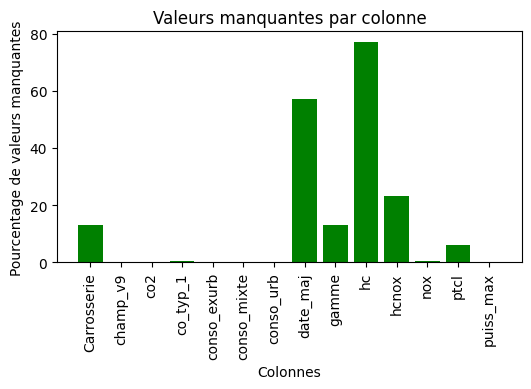

In [26]:
#Visualisation des valeurs manquantes avant de faire un choix sur leur traitement sous forme graphique

#On selectionne que les colonnes dont le % valeurs manquantes >0
nan_percentage = nan_percentage[nan_percentage > 0]

# Afficher le graphique
plt.figure(figsize=(6, 3))
plt.bar(nan_percentage.index, nan_percentage.values, color="green")
plt.xticks(rotation=90)
plt.xlabel("Colonnes")
plt.ylabel("Pourcentage de valeurs manquantes")
plt.title("Valeurs manquantes par colonne")
plt.show()

2.2 Transformation des données

In [27]:
# Conversion des variable en 'Float' ou numerique
cols_numeriques = ["puiss_max", "conso_urb", "conso_exurb", "conso_mixte", "co_typ_1", "nox", "hcnox", "ptcl", "co2"]

def convert_numeric(value):
    if isinstance(value, str):
        value = value.replace(",", ".") # On traite les colonnes qui ont un séparateur en ','
        try:
            return float(value)
        except ValueError:
            return np.nan
    return value

for col in cols_numeriques:
    df_final[col] = df_final[col].apply(convert_numeric)

2.2.1 Gestion des NaN

In [28]:
df_final.isnull().sum()

Carrosserie           20880
année                     0
champ_v9                185
cnit                      0
co2                     158
co_typ_1                690
conso_exurb             237
conso_mixte             158
conso_urb               237
date_maj              91428
dscom                     0
gamme                 20880
hc                   122967
hcnox                 37328
hybride                   0
lib_mod                   0
lib_mod_doss              0
lib_mrq_utac              0
masse_ordma_max           0
masse_ordma_min           0
nox                     690
ptcl                   9599
puiss_admin               0
puiss_max                56
tvv                       0
typ_boite_nb_rapp         0
typ_crb                   0
dtype: int64

In [29]:
df_final.groupby("année")[["Carrosserie", "gamme"]].apply(lambda x: x.isna().sum())

Carrosserie  gamme
année                    
2012             0      0
2013             0      0
2014             0      0
2015         20880  20880

In [30]:
df_final['gamme'].value_counts()

gamme
MOY-INFER         72530
MOY-SUPER         45334
LUXE              11714
SUPERIEURE         4907
INFERIEURE         3672
ECONOMIQUE          676
MOY-INFERIEURE       56
COUPE                 9
MOY-INF               2
Name: count, dtype: int64

In [31]:
# Tout mettre en majuscule et supprimer les espaces inutiles
df_final["gamme"] = df_final["gamme"].str.upper().str.strip()

# Correction des incohérences
corrections_gamme = {
    "MOY-INF": "MOY-INFER",
    "MOY-INFERIEURE": "MOY-INFER"
}

df_final["gamme"] = df_final["gamme"].replace(corrections_gamme)

In [32]:
df_final['gamme'].value_counts()

gamme
MOY-INFER     72588
MOY-SUPER     45334
LUXE          11714
SUPERIEURE     4907
INFERIEURE     3672
ECONOMIQUE      676
COUPE             9
Name: count, dtype: int64

In [33]:
df_final['Carrosserie'].value_counts()

Carrosserie
MINIBUS                110837
BERLINE                 12432
BREAK                    5015
TS TERRAINS/CHEMINS      2992
COUPE                    2692
CABRIOLET                1561
COMBISPACE               1416
MONOSPACE COMPACT        1275
MINISPACE                 435
MONOSPACE                 241
COMBISPCACE                 4
Name: count, dtype: int64

In [34]:
# Tout mettre en majuscules et supprimer les espaces inutiles
df_final["Carrosserie"] = df_final["Carrosserie"].str.upper().str.strip()

# Correction des fautes
corrections_carrosserie = {
    "COMBISPCACE": "COMBISPACE"
}

df_final["Carrosserie"] = df_final["Carrosserie"].replace(corrections_carrosserie)


In [35]:
df_final['Carrosserie'].value_counts()

Carrosserie
MINIBUS                110837
BERLINE                 12432
BREAK                    5015
TS TERRAINS/CHEMINS      2992
COUPE                    2692
CABRIOLET                1561
COMBISPACE               1420
MONOSPACE COMPACT        1275
MINISPACE                 435
MONOSPACE                 241
Name: count, dtype: int64

In [36]:
# Sélectionner uniquement les années 2012-2014 (où les valeurs sont complètes)
df_train = df_final[df_final["année"] < 2015]

# Trouver la Carrosserie la plus fréquente pour chaque gamme
mapping_carrosserie = df_train.groupby("gamme")["Carrosserie"].agg(lambda x: x.value_counts().idxmax())

# Trouver la Gamme la plus fréquente pour chaque Carrosserie
mapping_gamme = df_train.groupby("Carrosserie")["gamme"].agg(lambda x: x.value_counts().idxmax())


df_2015 = df_final[df_final["année"] == 2015]

# Tirer des valeurs de 'gamme' en respectant la distribution des années précédentes
gamme_sample = df_train["gamme"].dropna().sample(n=len(df_2015), replace=True, random_state=42).values

# Remplir les valeurs NaN de 'gamme' en 2015
df_final.loc[df_final["année"] == 2015, "gamme"] = gamme_sample

df_final.loc[df_final["année"] == 2015, "Carrosserie"] = df_final.loc[df_final["année"] == 2015, "gamme"].map(mapping_carrosserie)

In [37]:
df_final.isnull().sum()

Carrosserie               0
année                     0
champ_v9                185
cnit                      0
co2                     158
co_typ_1                690
conso_exurb             237
conso_mixte             158
conso_urb               237
date_maj              91428
dscom                     0
gamme                     0
hc                   122967
hcnox                 37328
hybride                   0
lib_mod                   0
lib_mod_doss              0
lib_mrq_utac              0
masse_ordma_max           0
masse_ordma_min           0
nox                     690
ptcl                   9599
puiss_admin               0
puiss_max                56
tvv                       0
typ_boite_nb_rapp         0
typ_crb                   0
dtype: int64

In [38]:
df_final['typ_crb'].value_counts()

typ_crb
GO        121998
ES         15737
GO         12675
ES          6934
EH           546
EH           497
GH           386
GH           135
EL           102
GN            91
EE            90
ES/GN         72
GN/ES         72
FE            70
GN            61
EL            56
ES/GP         55
GP/ES         55
ES/GN         52
GN/ES         36
GP/ES         21
ES/GP         21
EE            14
GL             2
FE             1
GL             1
Name: count, dtype: int64

In [39]:
# Nettoyer les valeurs (majuscule + suppression des espaces inutiles)
df_final["typ_crb"] = df_final["typ_crb"].str.upper().str.strip()

# Dictionnaire de correction des doublons et variantes
corrections_typ_crb = {
    "GO ": "GO", "ES ": "ES", "EH ": "EH", "GH ": "GH", "GN ": "GN", "EE ": "EE",
    "ES/GN": "GN/ES", "GP/ES": "ES/GP"
}

# Appliquer les corrections
df_final["typ_crb"] = df_final["typ_crb"].replace(corrections_typ_crb)

# Vérifier la nouvelle distribution après correction
print(df_final["typ_crb"].value_counts())

typ_crb
GO       134673
ES        22671
EH         1043
GH          521
GN/ES       232
EL          158
GN          152
ES/GP       152
EE          104
FE           71
GL            3
Name: count, dtype: int64


In [40]:
df_final["hcnox"] = df_final.groupby("typ_crb")["hcnox"].transform(lambda x: x.fillna(x.median()))
df_final["hcnox"].fillna(df_final["hcnox"].median(), inplace=True)
print("Nombre de NaN restants dans hcnox :", df_final["hcnox"].isna().sum())

Nombre de NaN restants dans hcnox : 0


c:\Users\J0348664\Downloads\DataScientest\Projet fin\projetCO2\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\J0348664\Downloads\DataScientest\Projet fin\projetCO2\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\J0348664\Downloads\DataScientest\Projet fin\projetCO2\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\J0348664\Downloads\DataScientest\Projet fin\projetCO2\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\J0348664\Downloads\DataScientest\Projet fin\projetCO2\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\J0348664\Downloads\DataScientest\Projet fin\projetCO2\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\J0348664\Downloads\DataScientest\Projet fin\proje

In [41]:
df_final.isnull().sum()

Carrosserie               0
année                     0
champ_v9                185
cnit                      0
co2                     158
co_typ_1                690
conso_exurb             237
conso_mixte             158
conso_urb               237
date_maj              91428
dscom                     0
gamme                     0
hc                   122967
hcnox                     0
hybride                   0
lib_mod                   0
lib_mod_doss              0
lib_mrq_utac              0
masse_ordma_max           0
masse_ordma_min           0
nox                     690
ptcl                   9599
puiss_admin               0
puiss_max                56
tvv                       0
typ_boite_nb_rapp         0
typ_crb                   0
dtype: int64

In [42]:
df_final["ptcl"] = df_final.groupby("typ_crb")["ptcl"].transform(lambda x: x.fillna(x.median()))

c:\Users\J0348664\Downloads\DataScientest\Projet fin\projetCO2\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\J0348664\Downloads\DataScientest\Projet fin\projetCO2\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning:

Mean of empty slice



In [43]:
print("Nombre de NaN restants dans ptcl :", df_final["ptcl"].isna().sum())

Nombre de NaN restants dans ptcl : 310


In [44]:
# # Remplacement des dernies NaN par la médiane ou le mode
# Identifier les colonnes numériques et catégorielles
df_final["ptcl"].fillna(df_final["ptcl"].median(), inplace=True)
cols_numeriques = ["co2","co_typ_1","conso_exurb","conso_mixte","conso_urb","nox","puiss_max"]
cols_categorielles = ["champ_v9"] 

# Remplacer les NaN des colonnes numériques par la moyenne
df_final[cols_numeriques] = df_final[cols_numeriques].fillna(df_final[cols_numeriques].mean())

# Remplacer les NaN des colonnes catégorielles par le mode
for col in cols_categorielles:
    df_final[col] = df_final[col].fillna(df_final[col].mode()[0])

# Vérification finale
print("Nombre total de NaN restants :", df_final.isna().sum().sum())

C:\Users\J0348664\AppData\Local\Temp\ipykernel_52604\1586960085.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Nombre total de NaN restants : 214395


In [45]:
# Effectuer un `value_counts()` pour chaque colonne du DataFrame
for col in df_final.columns:
    print(f"\n{col} :\n", df_final[col].value_counts())


Carrosserie :
 Carrosserie
MINIBUS                128507
BERLINE                 15642
BREAK                    5015
TS TERRAINS/CHEMINS      2992
COUPE                    2692
CABRIOLET                1561
COMBISPACE               1420
MONOSPACE COMPACT        1275
MINISPACE                 435
MONOSPACE                 241
Name: count, dtype: int64

année :
 année
2014    55037
2013    44231
2012    39632
2015    20880
Name: count, dtype: int64

champ_v9 :
 champ_v9
715/2007*692/2008EURO5     55096
"715/2007*692/2008EURO5    23979
715/2007*566/2011EURO5     16420
"715/2007*195/2013EURO5    14821
715/2007*136/2014EURO6     10003
"715/2007*566/2011EURO5     4851
715/2007*630/2012EURO5      4090
2005/55*2008/74EURO5        3654
2005/55*2008/74EEV          3604
715/2007*136/2014EURO5      3322
715/2007*195/2013EURO5      2627
"2005/55*2008/74EURO5       1864
"2005/55*2008/74EEV         1830
"715/2007*195/2013EURO6     1652
715/2007*195/2013EURO6      1535
"715/2007*630/2012EURO5     134

2.2.2 Correction et formatage des colonnes

In [46]:
# Dictionnaire de normalisation
df_final["lib_mrq_utac"] = df_final["lib_mrq_utac"].str.strip()
replace_dict = {
    "BMW I": "BMW",
    "BMW ": "BMW",
    "MERCEDES AMG": "MERCEDES",
    "MERCEDES BENZ": "MERCEDES",
    "MERCEDES-BENZ": "MERCEDES",
    "MERCEDES ": "MERCEDES",
    "ALFA-ROMEO": "ALFA ROMEO",
    "ROLLS-ROYCE" : "ROLLS ROYCE",
    "LAND ROVER": "JAGUAR LAND ROVER LIMITED",
    "RENAULT TECH": "RENAULT",
    "RENAULT ": "RENAULT",
    "FORD-CNG-TECHNIK" : "FORD",
    "VOLKSWAGEN-TECHNIK" : "VOLKSWAGEN",
}

# Remplacement dans la colonne
df_final["lib_mrq_utac"] = df_final["lib_mrq_utac"].replace(replace_dict)

# Vérifier les valeurs uniques après transformation
df_final["lib_mrq_utac"].unique().tolist()

['ALFA ROMEO',
 'MERCEDES',
 'AUDI',
 'BMW',
 'BENTLEY',
 'CADILLAC',
 'CHEVROLET',
 'CITROEN',
 'DACIA',
 'DANGEL',
 'DAIHATSU',
 'FIAT',
 'FORD',
 'HYUNDAI',
 'HONDA',
 'JAGUAR',
 'JEEP',
 'TOYOTA',
 'KIA',
 'LADA',
 'LAMBORGHINI',
 'JAGUAR LAND ROVER LIMITED',
 'LEXUS',
 'LANCIA',
 'MAYBACH',
 'MIA',
 'MASERATI',
 'MAZDA',
 'MINI',
 'MITSUBISHI',
 'INFINITI',
 'NISSAN',
 'OPEL',
 'PEUGEOT',
 'PORSCHE',
 'RENAULT',
 'ASTON MARTIN',
 'SEAT',
 'SKODA',
 'SMART',
 'SSANGYONG',
 'SUBARU',
 'SUZUKI',
 'TESLA',
 'QUATTRO',
 'VOLVO',
 'VOLKSWAGEN',
 'FERRARI',
 'LOTUS',
 'ROLLS ROYCE']

In [47]:
df_final["lib_mrq_utac"].nunique()

50

In [48]:
#On identifie et compte le nombre de 'outliers' pour toutes les colonnes 'float' et 'integer'
numerical_cols = df_final.select_dtypes(include=['float64', 'int64']).columns

# Calcul des quartiles et de l'IQR (interquartile range) pour les colonnes numériques
Q1 = df_final[numerical_cols].quantile(0.25)
Q3 = df_final[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identifier les outliers en utilisant les bornes inférieure et supérieure pour chaque colonne
outliers = ((df_final[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_final[numerical_cols] > (Q3 + 1.5 * IQR)))

# Afficher le nombre d'outliers pour chaque colonne
outliers_count = outliers.sum()
print(outliers_count)

année                  0
co2                21130
co_typ_1            2204
conso_exurb        32186
conso_mixte        23328
conso_urb          22258
hcnox              25954
masse_ordma_max     1494
masse_ordma_min    38739
nox                28695
ptcl               11778
puiss_admin        26845
puiss_max          27505
dtype: int64


2.2.3 Visualisation du dataframe

In [49]:
#GRAPHE 1 : Top 10 des marques les plus représentées

marques_count = df_final["lib_mrq_utac"].value_counts()

# Get the top 10 brands
top_marques = marques_count.head(10)
fig_horizontal = px.bar(
    y=top_marques.index,
    x=top_marques.values,
    title="Top 10 des marques les plus représentées",
    labels={"x": "Nombre d'occurrences", "y": "Marques"},
    color=top_marques.values,
    color_continuous_scale="viridis",
    orientation='h' # for horizontal
)

fig_horizontal.update_layout(
    yaxis_title="Marques",
    xaxis_title="Nombre d'occurrences",
    title_x=0.5,
    font=dict(
        family="Arial",
        size=12,
        color="black"
    )
)

fig_horizontal.show()

In [50]:
#GRAPHE 2 : Top 5 des type de carburant les plus représentés

carburant = df_final["typ_crb"].value_counts()
top_carburants = carburant.head(5)

fig = px.pie(
    top_carburants,
    values=top_carburants.values,
    names=top_carburants.index,
    title="Top 5 des types de carburant les plus représentés"
)

fig.show()

print("Analyse:")
print("Le gasoil domine très largement tous les autres carburants, suivi par l'essence.\nCe sont donc principalement ces 2 carburants qui ont potentiellement un rôle dans les émissions de CO2")

Analyse:
Le gasoil domine très largement tous les autres carburants, suivi par l'essence.
Ce sont donc principalement ces 2 carburants qui ont potentiellement un rôle dans les émissions de CO2


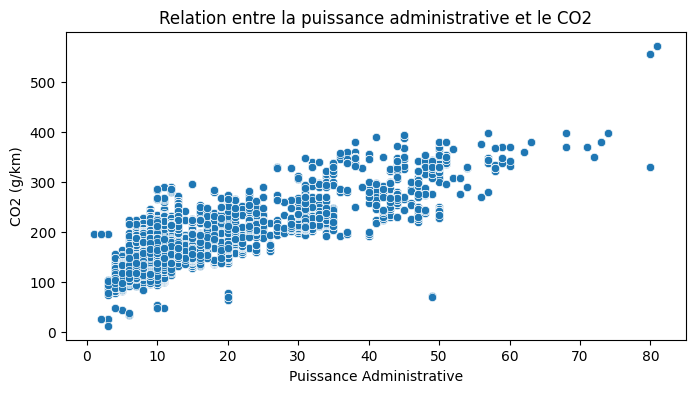

Analyse:
Le graphique montre une tendance claire : les émissions de CO2 augmentent avec la puissance administrative du véhicule. 
Cela est intuitif, car les véhicules plus puissants ont généralement des moteurs plus grands et donc polluent plus.

Résultat du test statistique :
Le test de Pearson donne un coefficient de corrélation de 0.46020799766082415, p-value: 0.0
Cela confirme notre constat : plus la puissance administrative est élevée, plus le co2 augmente.


In [51]:
#GRAPHE 3 : Relation entre puissance administrative et C02

plt.figure(figsize=(8, 4))
sns.scatterplot(x=df_final["puiss_admin"], y=df_final["co2"])

plt.title("Relation entre la puissance administrative et le CO2")
plt.xlabel("Puissance Administrative")
plt.ylabel("CO2 (g/km)")
plt.show()

print ("Analyse:")
print("Le graphique montre une tendance claire : les émissions de CO2 augmentent avec la puissance administrative du véhicule. \nCela est intuitif, car les véhicules plus puissants ont généralement des moteurs plus grands et donc polluent plus.")

# Calculer la corrélation de Pearson
corr, p_value = pearsonr(df_final["puiss_admin"], df_final["co2"])

print("\nRésultat du test statistique :")
print (f"Le test de Pearson donne un coefficient de corrélation de {corr}, p-value: {p_value}\nCela confirme notre constat : plus la puissance administrative est élevée, plus le co2 augmente.")

In [52]:
#GRAPHE 4 : Relation entre le type de carburant et les émissions de CO2

fig = px.box(
    df_final,
    x="typ_crb",
    y="co2",
    title="Relation entre le type de carburant et les émissions de CO2",
    labels={"typ_crb": "Type de carburant", "co2": "CO2 (g/km)"},
    color="typ_crb"
)
fig.update_layout(
    xaxis_title="Type de carburant",
    yaxis_title="CO2 (g/km)",
    title_x=0.5,
)
fig.show()

print ("Analyse:")
print("Le graphe suggère une relation entre le type de carburant et les émissions de CO2, avec des tendances distinctes pour certains types de carburant.\nOn note certaines aberrantes pour 'GO', 'ES' et 'ES/GP' qu'il faudra vérifier")

# Calculer le p-value grâce au test ANOVA (pour comparer les émissions de CO2 entre différents groupes de véhicules.)
groupes = [df_final[df_final["typ_crb"] == cat]["co2"] for cat in df_final["typ_crb"].unique()]
anova_result = f_oneway(*groupes)

print("\nRésultat du test statistique :")
print(f"Le test ANOVA  donne une p-value = {anova_result.pvalue} (car <0.05)\nIl existe une différence statistiquement très significative dans les émissions de CO2 en fonction du type de carburant. Les types de carburant ont un impact important sur les émissions de CO2.")


Analyse:
Le graphe suggère une relation entre le type de carburant et les émissions de CO2, avec des tendances distinctes pour certains types de carburant.
On note certaines aberrantes pour 'GO', 'ES' et 'ES/GP' qu'il faudra vérifier

Résultat du test statistique :
Le test ANOVA  donne une p-value = 0.0 (car <0.05)
Il existe une différence statistiquement très significative dans les émissions de CO2 en fonction du type de carburant. Les types de carburant ont un impact important sur les émissions de CO2.


In [53]:
# Afficher les statistiques par type de carburant
display(df_final.groupby("typ_crb")["co2"].describe())

count        mean           std         min         25%  \
typ_crb                                                               
EE          104.0   56.355769  1.380651e+01   13.000000   49.000000   
EH         1043.0  139.876318  3.692305e+01   75.000000  109.000000   
EL          158.0  195.577433  5.702416e-14  195.577433  195.577433   
ES        22671.0  194.396321  6.673947e+01   79.000000  140.000000   
ES/GP       152.0  136.078947  2.407618e+01  106.000000  120.000000   
FE           71.0  255.647887  9.883942e+01  132.000000  170.000000   
GH          521.0  112.117083  1.320838e+01   85.000000  103.000000   
GL            3.0   48.000000  0.000000e+00   48.000000   48.000000   
GN          152.0  171.625000  4.773822e+01   79.000000  118.000000   
GN/ES       232.0  179.810345  7.194501e+01   86.000000  117.500000   
GO       134673.0  196.731008  3.295417e+01   79.000000  190.000000   

                50%         75%         max  
typ_crb                                      
EE        65.000000   65.000000   79.000000  
EH       141.000000  158.000000  330.000000  
EL       195.577433  195.577433  195.577433  
ES       170.000000  249.000000  572.000000  
ES/GP    132.000000  145.000000  225.000000  
FE       225.000000  369.000000  376.000000  
GH       110.000000  120.000000  169.000000  
GL        48.000000   48.000000   48.000000  
GN       157.000000  222.000000  238.000000  
GN/ES    152.000000  238.000000  289.000000  
GO       203.000000  216.000000  298.000000

In [54]:
#GRAPHE 5 : Proportion de véhicules hybride par année

# Groupage par 'année' et 'hybride' et le nombre d'occurences
hybride_counts = df_final.groupby(['année', 'hybride']).size().reset_index(name='counts')

# Calcul du nombre totla de véhcule chaque année
total_counts = hybride_counts.groupby('année')['counts'].sum().reset_index(name='total')
hybride_counts = pd.merge(hybride_counts, total_counts, on='année')
hybride_counts['percentage'] = (hybride_counts['counts'] / hybride_counts['total']) * 100

# Creation du graphe
fig = px.bar(
    hybride_counts,
    x='année',
    y='percentage',
    color='hybride',
    title="Proportion de véhicules hybrides par année (2012-2015)",
    labels={'année': 'Année', 'percentage': 'Proportion de véhicules hybrides (%)', 'hybride': 'Type d\'hybridation'},
    barmode='group'
)

fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Proportion de véhicules hybrides (%)",
    title_x=0.5,
    legend_title="Type d'hybridation"
)

fig.show()

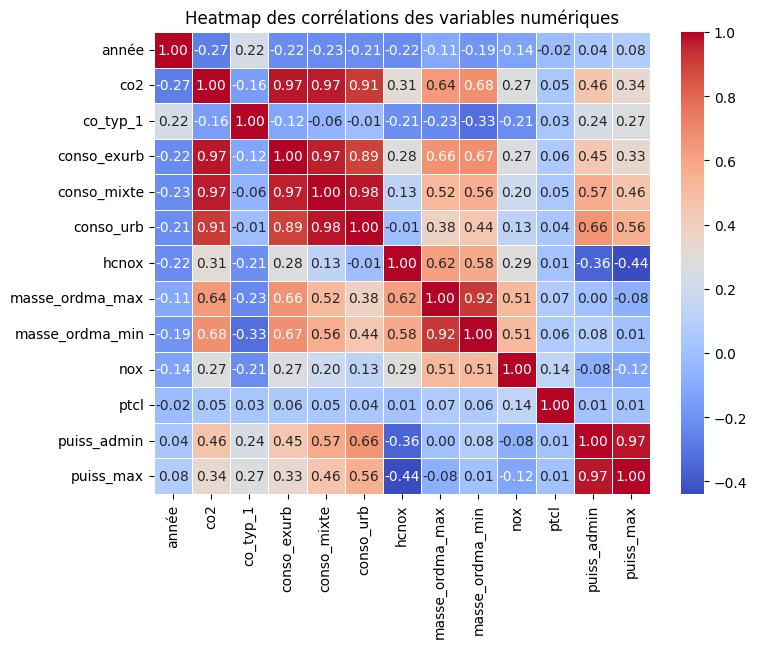

Conclusions: 
La variable cible semble être 'co2'.

**Les variables qui présentent une corrélation positive élevée sont :'conso_urb', 'conso_exurb' et 'conso_mixte'
C'est logique, car la consommation de carburant est une source majeure d'émissions de CO2.

**La variable qui montre une corrélation négative est : 'année'
Cela suggère que plus l'année augmente (donc, potentiellement, des véhicules plus récents), plus les émissions de CO2 ont tendance à diminuer


In [55]:
#GRAPHE 6: Identification de la variable cible avec un 'heatmap'

df_numeric = df_final.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap des corrélations des variables numériques")
plt.show()

#Interprétations
print("Conclusions: \nLa variable cible semble être 'co2'.")
print("\n**Les variables qui présentent une corrélation positive élevée sont :'conso_urb', 'conso_exurb' et 'conso_mixte'")
print("C'est logique, car la consommation de carburant est une source majeure d'émissions de CO2.")
print("\n**La variable qui montre une corrélation négative est : 'année'")
print("Cela suggère que plus l'année augmente (donc, potentiellement, des véhicules plus récents), plus les émissions de CO2 ont tendance à diminuer")

In [56]:
print(df_final[["conso_exurb", "conso_mixte", "conso_urb"]].count())

conso_exurb    159780
conso_mixte    159780
conso_urb      159780
dtype: int64


In [57]:
print(df_final[["masse_ordma_max", "masse_ordma_min"]].count())

masse_ordma_max    159780
masse_ordma_min    159780
dtype: int64


2.2.5 Test entre variables catégorielles

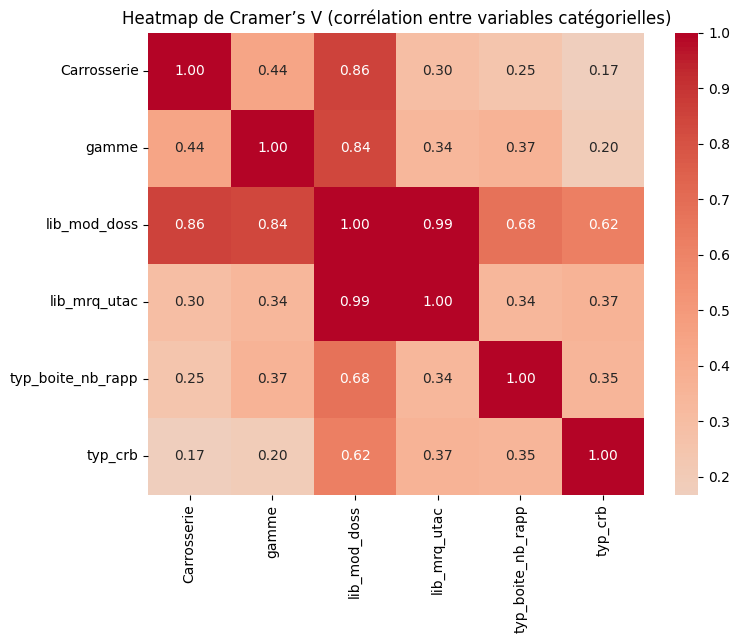

In [58]:
# Fonction pour calculer le Cramer's V entre deux variables catégorielles
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Sélection des colonnes catégorielles à analyser
categories = ["Carrosserie", "gamme","lib_mod_doss", "lib_mrq_utac", "typ_boite_nb_rapp","typ_crb"]

# Création d'une matrice vide pour stocker les valeurs de Cramer’s V
cramer_matrix = pd.DataFrame(np.zeros((len(categories), len(categories))), index=categories, columns=categories)

# Calcul de Cramer’s V pour chaque paire de variables catégorielles
for col1 in categories:
    for col2 in categories:
        if col1 != col2:
            cramer_matrix.loc[col1, col2] = cramers_v(df_final[col1], df_final[col2])
        else:
            cramer_matrix.loc[col1, col2] = 1  # Auto-corrélation = 1

# Conversion des valeurs en float
cramer_matrix = cramer_matrix.astype(float)

# Heatmap des relations entre variables catégorielles
plt.figure(figsize=(8,6))
sns.heatmap(cramer_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Heatmap de Cramer’s V (corrélation entre variables catégorielles)")
plt.show()

2.2.6 Gestion des outliers


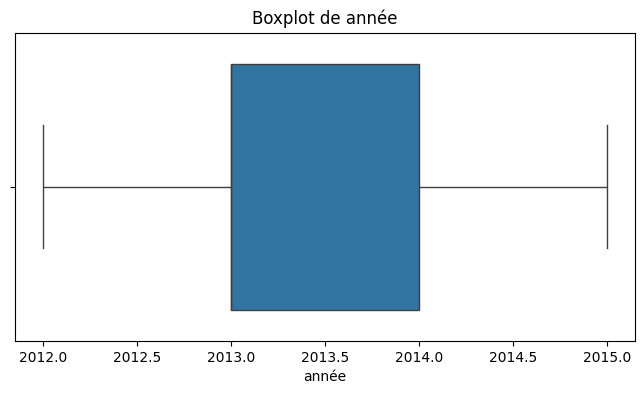

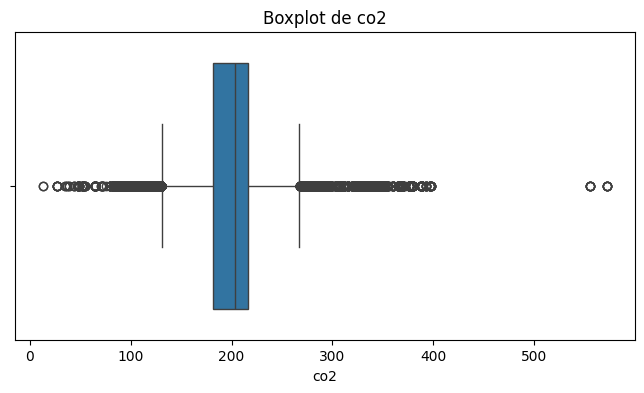

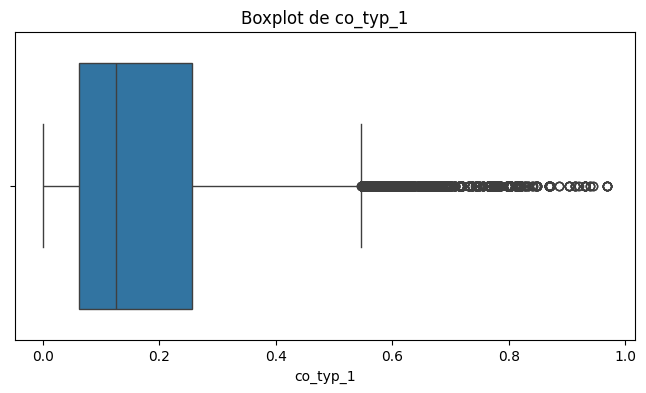

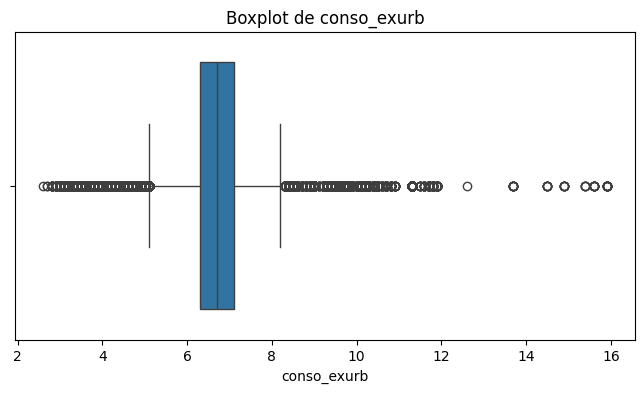

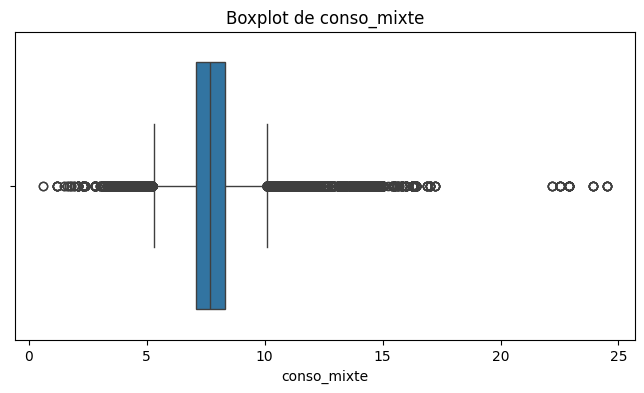

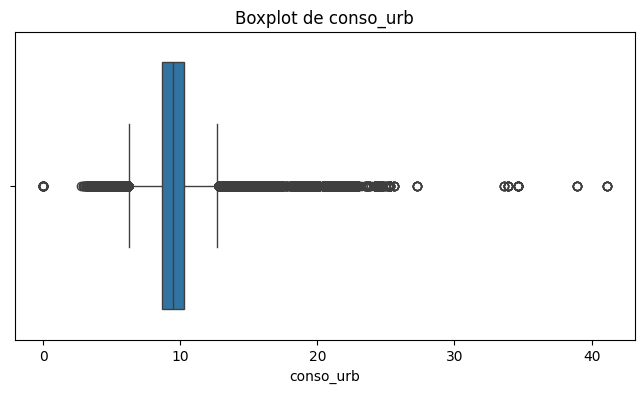

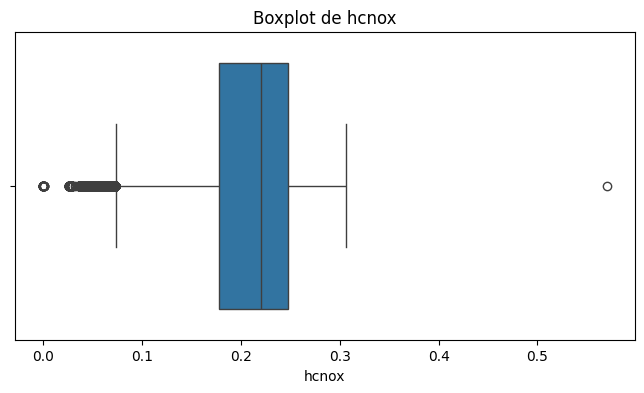

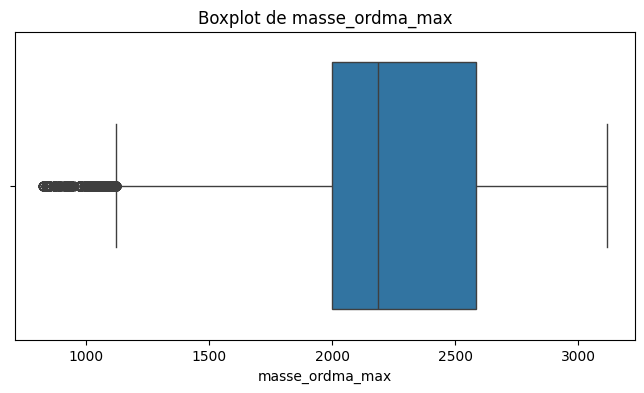

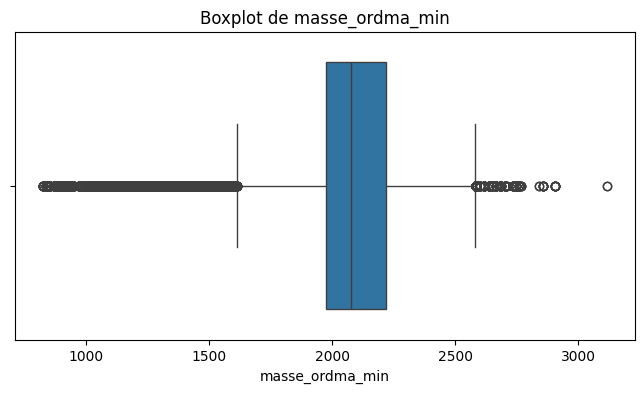

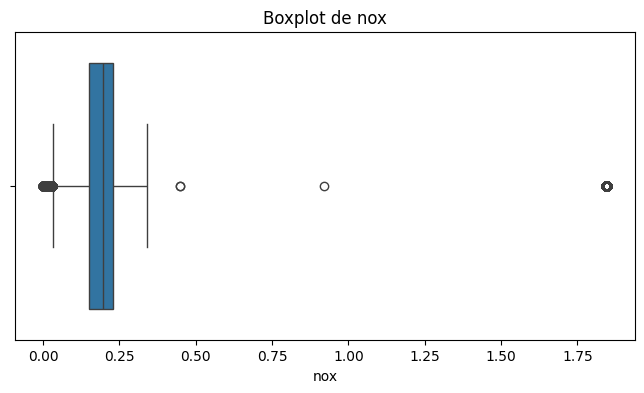

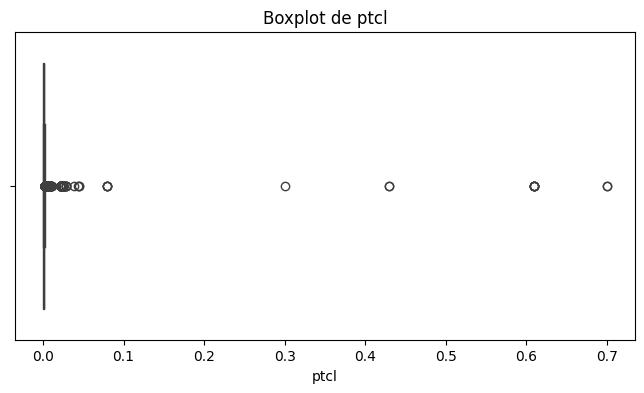

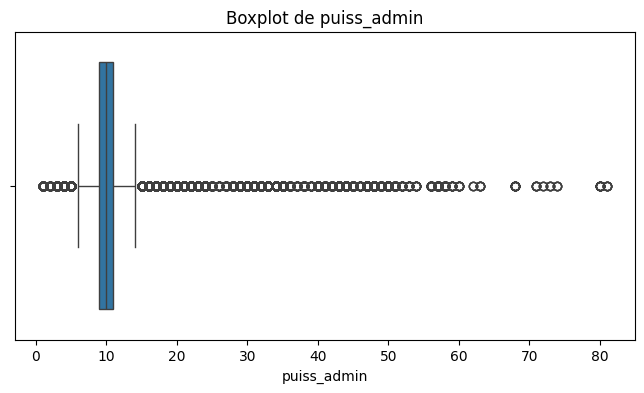

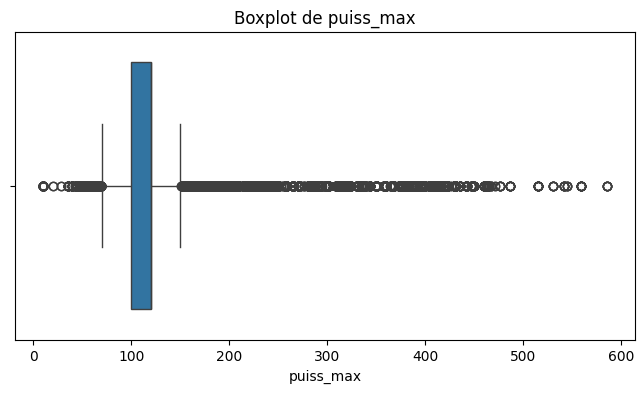

In [59]:
#Boxplot par variable numérique
# # Sélectionner les colonnes numériques
numerical_cols = df_final.select_dtypes(include=["int64", "float64"]).columns

# Créer un boxplot pour chaque variable numérique
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_final[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

In [60]:
# Filtrer les véhicules ayant un co_typ_1 supérieur à 0.5
outliers_co_typ_1_df = df_final[df_final["co_typ_1"] > 0.5]

# Afficher les premières lignes des véhicules concernés
print(outliers_co_typ_1_df.head())

# Optionnel : Voir le nombre total de véhicules concernés
print(f"Nombre de véhicules avec co_typ_1 > 0.5 : {len(outliers_co_typ_1_df)}")

   Carrosserie  année                champ_v9             cnit    co2  \
1      BERLINE   2012  715/2007*692/2008EURO5  M10ALFVP0000360   98.0   
6        COUPE   2012  715/2007*692/2008EURO5  M10ALFVP0003266  189.0   
8      BERLINE   2012  715/2007*692/2008EURO5  M10ALFVP0004037  129.0   
10       COUPE   2012  715/2007*692/2008EURO5  M10ALFVP0004267  189.0   
12     BERLINE   2012  715/2007*692/2008EURO5  M10ALFVP0005038  129.0   

    co_typ_1  conso_exurb  conso_mixte  conso_urb date_maj  ... lib_mrq_utac  \
1      0.528          3.8          4.2        4.9      NaN  ...   ALFA ROMEO   
6      0.601          6.0          8.1       11.8      NaN  ...   ALFA ROMEO   
8      0.519          4.5          5.6        7.4      NaN  ...   ALFA ROMEO   
10     0.601          6.0          8.1       11.8      NaN  ...   ALFA ROMEO   
12     0.519          4.5          5.6        7.4      NaN  ...   ALFA ROMEO   

   masse_ordma_max masse_ordma_min    nox   ptcl puiss_admin puiss_max  \
1     

C:\Users\J0348664\AppData\Local\Temp\ipykernel_52604\2865752253.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




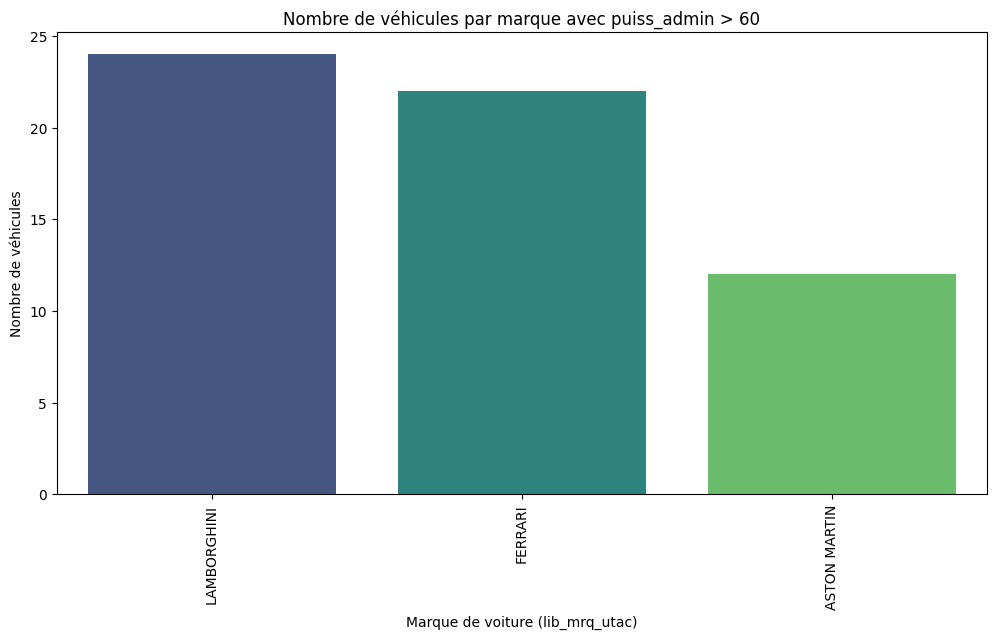

In [61]:
# Filtrer les véhicules ayant une puissance administrative supérieure à 60
high_power_cars = df_final[df_final["puiss_admin"] > 60]

# Compter le nombre de véhicules par marque
brand_counts = high_power_cars["lib_mrq_utac"].value_counts()

# Tracer un graphique des marques avec puiss_admin > 40
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Marque de voiture (lib_mrq_utac)")
plt.ylabel("Nombre de véhicules")
plt.title("Nombre de véhicules par marque avec puiss_admin > 60")
plt.show()

In [62]:
df_final_ml = df_final.copy()  # Crée une copie sous un nouveau nom

In [63]:
#Calcul du nombre_modalités de df_final
df_final_ml.nunique()
print("nombre_modalites")  # Output: 3

print("\nChoix des variables pour le one hot enconding:\n:'Carrosserie',\n'Gamme',\n'typ_crb'")
print("\nChoix des variables pour l'encodage par frequence encoding:\n'lib_mqr_utac',\n'type_boite_nb_rapp'")

nombre_modalites

Choix des variables pour le one hot enconding:
:'Carrosserie',
'Gamme',
'typ_crb'

Choix des variables pour l'encodage par frequence encoding:
'lib_mqr_utac',
'type_boite_nb_rapp'


In [64]:
#Affichage des NaN du dataframe final

# Calcul du nombre et du pourcentage de NaN
nan_counts = df_final.isnull().sum()
nan_percentage = df_final.isnull().mean() * 100

# Création d'un DataFrame pour afficher les résultats de manière combinée
nan_summary = pd.DataFrame({'Nombre de NaN': nan_counts, 'Pourcentage de NaN': nan_percentage})

display (nan_summary)

Nombre de NaN  Pourcentage de NaN
Carrosserie                    0            0.000000
année                          0            0.000000
champ_v9                       0            0.000000
cnit                           0            0.000000
co2                            0            0.000000
co_typ_1                       0            0.000000
conso_exurb                    0            0.000000
conso_mixte                    0            0.000000
conso_urb                      0            0.000000
date_maj                   91428           57.221179
dscom                          0            0.000000
gamme                          0            0.000000
hc                        122967           76.960195
hcnox                          0            0.000000
hybride                        0            0.000000
lib_mod                        0            0.000000
lib_mod_doss                   0            0.000000
lib_mrq_utac                   0            0.000000
masse_ordma_max                0            0.000000
masse_ordma_min                0            0.000000
nox                            0            0.000000
ptcl                           0            0.000000
puiss_admin                    0            0.000000
puiss_max                      0            0.000000
tvv                            0            0.000000
typ_boite_nb_rapp              0            0.000000
typ_crb                        0            0.000000

2.2.5 Suppression des variables administratives non essentielles

In [65]:
# Suppression des colonnes administratives
to_remove = [
    "hc", "date_maj",
    "champ_v9", "cnit", "dscom", "lib_mod",
    "tvv", "hybride", "lib_mod_doss"
]

# Suppression des colonnes présentant une multicolinéarité
to_remove += ["puiss_admin", "puiss_max","conso_exurb", "conso_urb", "conso_mixte", "masse_ordma_min", "masse_ordma_max"]

df_final_ml.drop(columns=to_remove, inplace=True, errors="ignore")

# puis relancez la vérification
cols_before = df_final.columns.tolist()
cols_after = df_final_ml.columns.tolist()
removed = [c for c in cols_before if c not in cols_after]
print("Colonnes supprimées après correction :", removed)

Colonnes supprimées après correction : ['champ_v9', 'cnit', 'conso_exurb', 'conso_mixte', 'conso_urb', 'date_maj', 'dscom', 'hc', 'hybride', 'lib_mod', 'lib_mod_doss', 'masse_ordma_max', 'masse_ordma_min', 'puiss_admin', 'puiss_max', 'tvv']


In [66]:
df_final_ml.shape

(159780, 11)

Etape 3 : Séparation du jeu d'entrainement et de test AVANT encodage

In [67]:
# Nettoyage initial AVANT split
df_final_ml = df_final.drop(columns=to_remove, errors="ignore")
X = df_final_ml.drop("co2", axis=1)
y = df_final_ml["co2"]

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Etape 4 : Encodage des variables

4.1 Encodage

In [68]:
# Encodage OneHotEncoder

# Sélection des colonnes à encoder
ohe_cols = ["Carrosserie", "gamme"]
ohe = OneHotEncoder(drop="first", sparse_output=False)  # Remplace `sparse` par `sparse_output`

# Entraîner l'encodeur sur X_train et appliquer sur X_train et X_test
X_train_ohe = ohe.fit_transform(X_train[ohe_cols])
X_test_ohe = ohe.transform(X_test[ohe_cols])

# Convertir en DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(ohe_cols))
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(ohe_cols))

# Supprimer les anciennes colonnes et ajouter les nouvelles colonnes encodées
X_train = X_train.drop(columns=ohe_cols).reset_index(drop=True)
X_test = X_test.drop(columns=ohe_cols).reset_index(drop=True)
X_train = pd.concat([X_train, X_train_ohe], axis=1)
X_test = pd.concat([X_test, X_test_ohe], axis=1)

In [69]:
# Étape 1 : Créer une nouvelle variable regroupée dans X_train et X_test
def regrouper_carburant(carb):
    if carb == "GO":
        return "GO"
    elif carb == "ES":
        return "ES"
    else:
        return "Autres"

X_train["typ_crb_grp"] = X_train["typ_crb"].apply(regrouper_carburant)
X_test["typ_crb_grp"] = X_test["typ_crb"].apply(regrouper_carburant)

# Étape 2 : Encoder avec OneHotEncoder dans le même style que ton code précédent
ohe_typ_crb = OneHotEncoder(drop=None, sparse_output=False)  # garde les 3 catégories

X_train_crb = ohe_typ_crb.fit_transform(X_train[["typ_crb_grp"]])
X_test_crb = ohe_typ_crb.transform(X_test[["typ_crb_grp"]])

# Étape 3 : Convertir en DataFrame avec noms de colonnes
X_train_crb = pd.DataFrame(X_train_crb, columns=ohe_typ_crb.get_feature_names_out(["typ_crb_grp"]))
X_test_crb = pd.DataFrame(X_test_crb, columns=ohe_typ_crb.get_feature_names_out(["typ_crb_grp"]))

# Étape 4 : Supprimer les colonnes originales et concaténer les encodées
X_train = X_train.drop(columns=["typ_crb", "typ_crb_grp"]).reset_index(drop=True)
X_test = X_test.drop(columns=["typ_crb", "typ_crb_grp"]).reset_index(drop=True)

X_train = pd.concat([X_train, X_train_crb], axis=1)
X_test = pd.concat([X_test, X_test_crb], axis=1)

In [70]:
# Sélection des colonnes à encoder avec Frequency Encoding
freq_cols = ["lib_mrq_utac", "typ_boite_nb_rapp"]

# Calculer la fréquence des catégories sur X_train
freq_maps = {col: X_train[col].value_counts(normalize=True) for col in freq_cols}

# Appliquer l’encodage sur X_train et X_test
for col in freq_cols:
    X_train[col] = X_train[col].map(freq_maps[col])
    X_test[col] = X_test[col].map(freq_maps[col]).fillna(0)  # Si une modalité de test n'existe pas dans train

4.2 Standardisation

In [71]:
# Colonnes One-Hot déjà encodées
ohe_cols = ["Carrosserie", "gamme", "typ_crb_grp"]
one_hot_generated_cols = (
    ohe.get_feature_names_out(["Carrosserie", "gamme"]).tolist() +
    ohe_typ_crb.get_feature_names_out(["typ_crb_grp"]).tolist()
)

# Colonnes à exclure de la standardisation
cols_to_exclude = one_hot_generated_cols + ["lib_mrq_utac", "typ_boite_nb_rapp"]

# Colonnes numériques à standardiser (hors celles à exclure)
numerical_cols = [col for col in X_train.select_dtypes(include=["int64", "float64"]).columns if col not in cols_to_exclude]

# Standardisation
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

4.3 Vérification du dataframe final utilisé pour les modèles

In [72]:
# Vérifiez que les dimensions et types de données sont logiques
print("Shape X_train:", X_train.shape, "| X_test:", X_test.shape)
print("\nTypes dans X_train:")
print(X_train.dtypes.value_counts())

print ("\nOn affiche un échantillon pour vérifier que les données sont bien encodées/standardisées")
display(X_train.head(2))

Shape X_train: (127824, 25) | X_test: (31956, 25)

Types dans X_train:
float64    25
Name: count, dtype: int64

On affiche un échantillon pour vérifier que les données sont bien encodées/standardisées


année  co_typ_1     hcnox  lib_mrq_utac       nox      ptcl  \
0  1.655625  0.726938 -2.023363      0.003607 -0.601101  0.010046   
1 -0.356331  1.840149 -0.595800      0.096257 -0.418953 -0.180401   

   typ_boite_nb_rapp  Carrosserie_BREAK  Carrosserie_CABRIOLET  \
0           0.045907                0.0                    0.0   
1           0.432290                0.0                    0.0   

   Carrosserie_COMBISPACE  ...  Carrosserie_TS TERRAINS/CHEMINS  \
0                     0.0  ...                              0.0   
1                     1.0  ...                              0.0   

   gamme_ECONOMIQUE  gamme_INFERIEURE  gamme_LUXE  gamme_MOY-INFER  \
0               0.0               0.0         0.0              1.0   
1               0.0               1.0         0.0              0.0   

   gamme_MOY-SUPER  gamme_SUPERIEURE  typ_crb_grp_Autres  typ_crb_grp_ES  \
0              0.0               0.0                 0.0             1.0   
1              0.0               0.0                 0.0             0.0   

   typ_crb_grp_GO  
0             0.0  
1             1.0  

[2 rows x 25 columns]

In [73]:
# 2) Nouvelle vérification des colonnes supprimées
cols_before = df_final.columns.tolist()
cols_after = df_final_ml.columns.tolist()
removed = [c for c in cols_before if c not in cols_after]
print("Colonnes supprimées après correction :", removed)

Colonnes supprimées après correction : ['champ_v9', 'cnit', 'conso_exurb', 'conso_mixte', 'conso_urb', 'date_maj', 'dscom', 'hc', 'hybride', 'lib_mod', 'lib_mod_doss', 'masse_ordma_max', 'masse_ordma_min', 'puiss_admin', 'puiss_max', 'tvv']


Etape 5 : Selection du modèle

5.1 Modèles conventionnels & GridSearch

In [75]:
# --- Préparation à la sauvegarde ---

# Création du dossier pour stocker les modèles de régression s'il n'existe pas
output_dir_reg = "saved_models_regression"
os.makedirs(output_dir_reg, exist_ok=True)
print(f"Dossier de sauvegarde '{output_dir_reg}' prêt.")

# Sauvegarde des transformateurs et informations communes à tous les modèles

# 1. Le StandardScaler
with open(os.path.join(output_dir_reg, "reg_scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)
print("StandardScaler sauvegardé.")

# 2. Le OneHotEncoder pour 'Carrosserie' et 'gamme'
with open(os.path.join(output_dir_reg, "reg_ohe_carrosserie_gamme.pkl"), "wb") as f:
    pickle.dump(ohe, f)
print("OneHotEncoder (Carrosserie/gamme) sauvegardé.")

# 3. Le OneHotEncoder pour 'typ_crb'
with open(os.path.join(output_dir_reg, "reg_ohe_typ_crb.pkl"), "wb") as f:
    pickle.dump(ohe_typ_crb, f)
print("OneHotEncoder (typ_crb) sauvegardé.")

# 4. Les mappings pour le Frequency Encoding
with open(os.path.join(output_dir_reg, "reg_freq_maps.pkl"), "wb") as f:
    pickle.dump(freq_maps, f)
print("Dictionnaire des mappings de fréquence sauvegardé.")

# 5. La liste et l'ordre des colonnes de X_train (après transformation)
# C'est la structure exacte que les modèles attendent en entrée.
X_train_reg_cols = X_train.columns.tolist()
with open(os.path.join(output_dir_reg, "reg_X_train_columns.pkl"), "wb") as f:
    pickle.dump(X_train_reg_cols, f)
print("Liste des colonnes du X_train final sauvegardée.")


# ==================================================================
# 1. MODÈLES CONVENTIONNELS (PARAMÈTRES PAR DÉFAUT)
# ==================================================================
print("\n--- Entraînement et sauvegarde des modèles conventionnels ---")
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': xgb.XGBRegressor(random_state=42)
}

results = {}
trained_models = {}

for name, model in models.items():
    print(f"Entraînement de {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    # --- SAUVEGARDE DU MODÈLE CONVENTIONNEL ---
    filename_conv = f"reg_conventionnel_{name.replace(' ', '_').lower()}.pkl"
    with open(os.path.join(output_dir_reg, filename_conv), "wb") as f:
        pickle.dump(model, f)
    print(f"✅ Modèle conventionnel '{name}' sauvegardé dans : {filename_conv}")
    # ----------------------------------------
    
    # Évaluation
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

print("\nRésultats des modèles conventionnels:")
for name, metrics in results.items():
    print(f"{name}: MAE={metrics['MAE']:.2f}, MSE={metrics['MSE']:.2f}, R2={metrics['R2']:.2f}")


# ==================================================================
# 2. MODÈLES OPTIMISÉS (GRIDSEARCHCV)
# ==================================================================
print("\n--- Entraînement et sauvegarde des modèles GridSearchCV ---")
param_grids = {
    'Linear Regression': {},
    'Random Forest Regressor': {'n_estimators': [50, 100], 'max_depth': [None, 10]},
    'Gradient Boosting Regressor': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    'XGBoost Regressor': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
}

grid_search_results = {}
grid_models = {}
# Dictionnaire pour stocker les meilleurs hyperparamètres
best_hyperparams = {}

for name, model in models.items():
    print(f"Entraînement de GridSearchCV pour {name}…")
    gs = GridSearchCV(model,
                      param_grids[name],
                      cv=3,
                      scoring='neg_mean_squared_error',
                      n_jobs=-1)
    gs.fit(X_train, y_train)
    
    best = gs.best_estimator_
    grid_models[name] = best
    
    # --- SAUVEGARDE DU MODÈLE GRIDSEARCH ---
    filename_gs = f"reg_gridsearch_{name.replace(' ', '_').lower()}.pkl"
    with open(os.path.join(output_dir_reg, filename_gs), "wb") as f:
        pickle.dump(best, f)
    print(f"✅ Modèle GridSearchCV '{name}' sauvegardé dans : {filename_gs}")
    
    # --- SAUVEGARDE DES MEILLEURS HYPERPARAMÈTRES ---
    best_hyperparams[name] = gs.best_params_
    # -------------------------------------
    
    # Évaluation
    y_pred = best.predict(X_test)
    grid_search_results[name] = {
        'MAE'        : mean_absolute_error(y_test, y_pred),
        'MSE'        : mean_squared_error(y_test, y_pred),
        'R2'         : r2_score(y_test, y_pred),
        'best_params': gs.best_params_  # Garder le dictionnaire original
    }

print("\nRésultats des modèles avec GridSearchCV:")
for name, metrics in grid_search_results.items():
    print(f"{name}: MAE={metrics['MAE']:.2f}, MSE={metrics['MSE']:.2f}, R2={metrics['R2']:.2f}, Best Params={metrics['best_params']}")


# ==================================================================
# SAUVEGARDE DES HYPERPARAMÈTRES DÉTAILLÉS AVEC MÉTRIQUES
# ==================================================================
print("\n--- Sauvegarde des hyperparamètres détaillés ---")

# Sauvegarde détaillée avec métriques de performance
detailed_hyperparams_data = []
for model_name, params in best_hyperparams.items():
    metrics = grid_search_results[model_name]
    if params:  # Si le modèle a des hyperparamètres optimisés
        for param_name, param_value in params.items():
            detailed_hyperparams_data.append({
                'Model': model_name,
                'Parameter': param_name,
                'Best_Value': param_value,
                'MAE': metrics['MAE'],
                'MSE': metrics['MSE'],
                'R2': metrics['R2']
            })
    else:  # Pour les modèles sans hyperparamètres
        detailed_hyperparams_data.append({
            'Model': model_name,
            'Parameter': 'No hyperparameters',
            'Best_Value': 'Default',
            'MAE': metrics['MAE'],
            'MSE': metrics['MSE'],
            'R2': metrics['R2']
        })

df_detailed_hyperparams = pd.DataFrame(detailed_hyperparams_data)
detailed_hyperparams_filename = "best_hyperparameters_with_metrics.csv"
df_detailed_hyperparams.to_csv(os.path.join(output_dir_reg, detailed_hyperparams_filename), index=False)
print(f"✅ Hyperparamètres détaillés avec métriques sauvegardés : {detailed_hyperparams_filename}")

# Affichage du tableau des hyperparamètres détaillés
print("\n=== Meilleurs Hyperparamètres avec Métriques ===")
print(df_detailed_hyperparams)


# ==================================================================
# FINALISATION ET SAUVEGARDE DES RÉSULTATS
# ==================================================================

# Création d'un DataFrame unique pour comparer tous les résultats
comparison_data = []
for name, metrics in results.items():
    comparison_data.append({
        'Model': name,
        'Type': 'Conventionnel',
        'MAE': metrics['MAE'],
        'MSE': metrics['MSE'],
        'R2': metrics['R2']
    })

for name, metrics in grid_search_results.items():
    comparison_data.append({
        'Model': name,
        'Type': 'GridSearchCV',
        'MAE': metrics['MAE'],
        'MSE': metrics['MSE'],
        'R2': metrics['R2']
    })

df_reg_results = pd.DataFrame(comparison_data)

# Sauvegarde du tableau récapitulatif des performances
results_filename = "regression_model_performance.csv"
df_reg_results.to_csv(os.path.join(output_dir_reg, results_filename), index=False)
print(f"\n✅ Tableau récapitulatif de la régression sauvegardé dans : {results_filename}")

print("\n=== Synthèse des Performances de Régression ===")
print(df_reg_results.sort_values('MSE', ascending=True).reset_index(drop=True))


Dossier de sauvegarde 'saved_models_regression' prêt.
StandardScaler sauvegardé.
OneHotEncoder (Carrosserie/gamme) sauvegardé.
OneHotEncoder (typ_crb) sauvegardé.
Dictionnaire des mappings de fréquence sauvegardé.
Liste des colonnes du X_train final sauvegardée.

--- Entraînement et sauvegarde des modèles conventionnels ---
Entraînement de Linear Regression...
✅ Modèle conventionnel 'Linear Regression' sauvegardé dans : reg_conventionnel_linear_regression.pkl
Entraînement de Random Forest Regressor...
✅ Modèle conventionnel 'Random Forest Regressor' sauvegardé dans : reg_conventionnel_random_forest_regressor.pkl
Entraînement de Gradient Boosting Regressor...
✅ Modèle conventionnel 'Gradient Boosting Regressor' sauvegardé dans : reg_conventionnel_gradient_boosting_regressor.pkl
Entraînement de XGBoost Regressor...
✅ Modèle conventionnel 'XGBoost Regressor' sauvegardé dans : reg_conventionnel_xgboost_regressor.pkl

Résultats des modèles conventionnels:
Linear Regression: MAE=19.13, MSE=7

5.2 Comparaison de la performance des modèles et choix du meilleur modèle

In [76]:
# Preparation du tableau conventionel vs gridsearch
data_grid      = []
best_mse       = np.inf
best_model     = None
best_model_type= None

# iterate over exactly the same model‐names you used in training
for model_name, conventional_result in results.items():
    
    # pull in grid-search results if available
    grid_result = {}
    if 'grid_search_results' in globals():
        grid_result = grid_search_results.get(model_name, {})

    # 1) check “Conventional”
    mse_conv = conventional_result.get('MSE', np.nan)
    if mse_conv < best_mse:
        best_mse = mse_conv
        best_model = model_name
        best_model_type = 'Conventional'
    
    data_grid.append({
        'Model': model_name,
        'Type' : 'Conventional',
        'MSE'  : mse_conv,
        'R2'   : conventional_result.get('R2', np.nan)
    })

    # 2) check “GridSearchCV” (only if we actually have results)
    if grid_result:
        mse_gs = grid_result.get('MSE', np.nan)
        if mse_gs < best_mse:
            best_mse = mse_gs
            best_model = model_name
            best_model_type = 'GridSearchCV'
        
        data_grid.append({
            'Model': model_name,
            'Type' : 'GridSearchCV',
            'MSE'  : mse_gs,
            'R2'   : grid_result.get('R2', np.nan)
        })

# Build DataFrame
df_grid = pd.DataFrame(data_grid)
df_grid[['MSE','R2']] = df_grid[['MSE','R2']].round(4)

# Build Plotly table
fig_grid = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Model</b>','<b>Type</b>','<b>MSE</b>','<b>R2</b>'],
        fill_color='paleturquoise',
        align='left'
    ),
    cells=dict(
        values=[
            df_grid['Model'], 
            df_grid['Type'], 
            df_grid['MSE'], 
            df_grid['R2']
        ],
        fill_color=[['white']*len(df_grid)]*4,
        align='left'
    )
)])

# Highlight best + color‐code R2
for i, row in df_grid.iterrows():
    # highlight best
    if row['Model']==best_model and row['Type']==best_model_type:
        for col in range(4):
            fig_grid.data[0].cells.fill.color[col][i] = 'gold'
    # color‐code R2
    r2 = row['R2']
    if pd.notna(r2):
        if r2 > 0.95:
            color = 'lightgreen'
        elif r2 < 0.7:
            color = 'lightcoral'
        elif r2 < 0.9:
            color = 'lightyellow'
        else:
            color = None
        if color:
            # R2 is the 4th column → index 3
            fig_grid.data[0].cells.fill.color[3][i] = color

# Layout tweaks
fig_grid.update_layout(
    title_text="<b>Model Performance Comparison</b>",
    margin=dict(l=20,r=20,t=60,b=20),
    width=1000, height=300
)

fig_grid.show()

# Print best model summary
print("\n=== BEST PERFORMING MODEL ===")
print(f"{best_model} ({best_model_type})")
best_row = df_grid[
    (df_grid['Model']==best_model) & 
    (df_grid['Type']==best_model_type)
].iloc[0]
print(f"MSE: {best_row['MSE']:.4f}")
print(f"R²:  {best_row['R2']:.4f}")



=== BEST PERFORMING MODEL ===
Random Forest Regressor (Conventional)
MSE: 37.0490
R²:  0.9772


5.3 Feature Importance

In [77]:
#INFORMATIF: pourquoi faire à la fois Feature Importance & SHAP
fig = go.Figure(data=[go.Table(
    header=dict(values=["<b>Aspect</b>", "<b>Feature Importance</b>", "<b>SHAP Values</b>"],
                fill_color='#4a7dc4',
                font=dict(color='white', size=12),
                align='left',
                height=40),
    cells=dict(values=[
        ["Scope", "Direction", "Model Types", "Computation", "Interpretation"],
        ["Global (whole model)", "Magnitude only", "Mainly tree-based", "Fast", "\"Overall importance\""],
        ["Global + Local (per prediction)", "Magnitude + Direction", "Works for all models", 
         "Slower (especially for large datasets)", "\"How/why this prediction?\""]
    ],
    fill_color=['#e6e6e6', '#f9f9f9', '#ffffff'],
    font=dict(size=12),
    align='left',
    height=30))
])

fig.update_layout(
    title="<b>Comparison: Feature Importance vs SHAP Values</b>",
    title_x=0.5,
    margin=dict(l=20, r=20, t=60, b=20),
    width=900,
    height=350
)

fig.show()

5.3.1 Analyse des modèles Conventionels vs Gridsearch

In [78]:
# Modèles conventionnels d'abord puis gridsearch
gbr = GradientBoostingRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)
xgbr = xgb.XGBRegressor(random_state=42)
lr = LinearRegression()  # Linear Regression

gbr.fit(X_train, y_train)   # Using X_train (which now contains scaled numerical features and encoded categorical features)
rfr.fit(X_train, y_train)   # Using X_train
xgbr.fit(X_train, y_train)  # Using X_train
lr.fit(X_train, y_train)    # Using X_train

# Feature importance pour les modèles conventionnels
gbr_importance_conventional = pd.Series(gbr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rfr_importance_conventional = pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
xgbr_importance_conventional = pd.Series(xgbr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
lr_importance_conventional = pd.Series(np.abs(lr.coef_), index=X_train.columns).sort_values(ascending=False)  # Linear Regression

# Modèles avec GridSearchCV (remains unchanged)
param_grid_gbr = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 4]}
grid_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gbr, cv=2)
grid_gbr.fit(X_train, y_train)
gbr_best = grid_gbr.best_estimator_
gbr_importance_grid = pd.Series(gbr_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

param_grid_rfr = {'n_estimators': [100, 200], 'max_depth': [None, 5], 'min_samples_split': [2, 5]}
grid_rfr = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rfr, cv=2)
grid_rfr.fit(X_train, y_train)
rfr_best = grid_rfr.best_estimator_
rfr_importance_grid = pd.Series(rfr_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

param_grid_xgbr = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 4]}
grid_xgbr = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid_xgbr, cv=2)
grid_xgbr.fit(X_train, y_train)
xgbr_best = grid_xgbr.best_estimator_
xgbr_importance_grid = pd.Series(xgbr_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plotting avec Plotly
def plot_feature_importance(importance_series, title, color):
    fig = go.Figure(
        go.Bar(x=importance_series.index, y=importance_series.values, marker_color=color)
    )
    fig.update_layout(title_text=title, xaxis_title="Feature", yaxis_title="Importance")
    return fig

# (Optional) Plot each model separately
fig_gbr_conv = plot_feature_importance(gbr_importance_conventional.head(10), "GBR Feature Importance (Conventional)", 'royalblue')
fig_rfr_conv = plot_feature_importance(rfr_importance_conventional.head(10), "RandomForest Feature Importance (Conventional)", 'seagreen')
fig_xgbr_conv = plot_feature_importance(xgbr_importance_conventional.head(10), "XGBoost Feature Importance (Conventional)", 'mediumpurple')

# Create a combined subplot for the GridSearchCV models (unchanged)
fig_grid = make_subplots(
    rows=1, cols=3,
    subplot_titles=('XGBoost (GridSearchCV)', 'GBR (GridSearchCV)', 'RandomForest (GridSearchCV)')
)

fig_grid.add_trace(
    go.Bar(x=xgbr_importance_grid.head(10).index, y=xgbr_importance_grid.head(10).values, marker_color='royalblue', name='XGBoost'),
    row=1, col=1
)
fig_grid.add_trace(
    go.Bar(x=gbr_importance_grid.head(10).index, y=gbr_importance_grid.head(10).values, marker_color='tomato', name='GBM'),
    row=1, col=2
)
fig_grid.add_trace(
    go.Bar(x=rfr_importance_grid.head(10).index, y=rfr_importance_grid.head(10).values, marker_color='seagreen', name='RandomForest'),
    row=1, col=3
)

fig_grid.update_layout(title_text='Feature Importance Side by Side (GridSearchCV)')
fig_grid.show()

# Create a combined subplot for all conventional models (including Linear Regression)
fig_conventional = make_subplots(
    rows=1, cols=4,
    subplot_titles=(
        'XGBoost (Conventional)',
        'GBR (Conventional)',
        'RandomForest (Conventional)',
        'Linear Regression (Conventional)'
    )
)

fig_conventional.add_trace(
    go.Bar(
        x=xgbr_importance_conventional.head(10).index,
        y=xgbr_importance_conventional.head(10).values,
        marker_color='mediumpurple',
        name='XGBoost'
    ),
    row=1, col=1
)
fig_conventional.add_trace(
    go.Bar(
        x=gbr_importance_conventional.head(10).index,
        y=gbr_importance_conventional.head(10).values,
        marker_color='royalblue',
        name='GBR'
    ),
    row=1, col=2
)
fig_conventional.add_trace(
    go.Bar(
        x=rfr_importance_conventional.head(10).index,
        y=rfr_importance_conventional.head(10).values,
        marker_color='seagreen',
        name='RandomForest'
    ),
    row=1, col=3
)
fig_conventional.add_trace(
    go.Bar(
        x=lr_importance_conventional.head(10).index,
        y=lr_importance_conventional.head(10).values,
        marker_color='darkorange',
        name='Linear Regression'
    ),
    row=1, col=4
)

fig_conventional.update_layout(title_text='Feature Importance Side by Side (Conventional)')
fig_conventional.show()


5.3.2 Analyse des coefficients

In [79]:
# Défini le nom des modèles enregistrés dans trained_models et grid_models
model_list = [
    'Linear Regression',
    'Random Forest Regressor',
    'Gradient Boosting Regressor',
    'XGBoost Regressor'
]
# Extraction des coefficients / importances 
all_coefs = {}
for name in model_list:
    # modèle conventionnel
    mdl = trained_models.get(name)
    if mdl is not None:
        key = f"{name} (conv)"
        if hasattr(mdl, "coef_"):
            vals = mdl.coef_.ravel()
        elif hasattr(mdl, "feature_importances_"):
            vals = mdl.feature_importances_
        else:
            vals = None
        if vals is not None:
            all_coefs[key] = pd.Series(vals, index=X_train.columns)
    # modèle gridsearchCV
    mdlg = grid_models.get(name)
    if mdlg is not None:
        key = f"{name} (grid)"
        if hasattr(mdlg, "coef_"):
            vals = mdlg.coef_.ravel()
        elif hasattr(mdlg, "feature_importances_"):
            vals = mdlg.feature_importances_
        else:
            vals = None
        if vals is not None:
            all_coefs[key] = pd.Series(vals, index=X_train.columns)

# Construction de df_coefs 
df_coefs = pd.DataFrame(all_coefs)
df_coefs.index.name = "Feature"

# Préparation du top‐3 highlights 
n_rows = len(df_coefs)
n_cols = len(df_coefs.columns)

row_colors = ['white' if i%2==0 else 'whitesmoke' for i in range(n_rows)]

# fill_colors : une liste de listes, une pour chaque colonne du tableau
fill_colors = []
fill_colors.append(row_colors)

for col in df_coefs.columns:
    # on prend les 3 plus fortes importances absolues
    top3 = df_coefs[col].abs().nlargest(3).index.tolist()
    col_colors = [
        'lightgreen' if feat in top3 else base
        for feat, base in zip(df_coefs.index, row_colors)
    ]
    fill_colors.append(col_colors)

# Construction de la table Plotly
fig = go.Figure(data=[
    go.Table(
        columnwidth = [200] + [100]*n_cols,
        header=dict(
            values=["<b>Feature</b>"] + [f"<b>{c}</b>" for c in df_coefs.columns],
            fill_color='darkslategray',
            font=dict(color='white', size=14),
            align='left'
        ),
        cells=dict(
            values=[df_coefs.index.tolist()] +
                   [df_coefs[c].round(3).tolist() for c in df_coefs.columns],
            fill_color=fill_colors,
            align='left'
        )
    )
])

fig.update_layout(
    title="Coefficients par modèle + Top 3 des features importance en vert",
    width=950,
    height=120 + 25*n_rows,
    margin=dict(l=20, r=20, t=60, b=20)
)
fig.show()


5.4 SHAP Analysis

5.4.1 Comparative SHAP Analysis for all models


=== SHAP Analysis: Conventional Models ===

Running SHAP for Conv_Linear Regression …


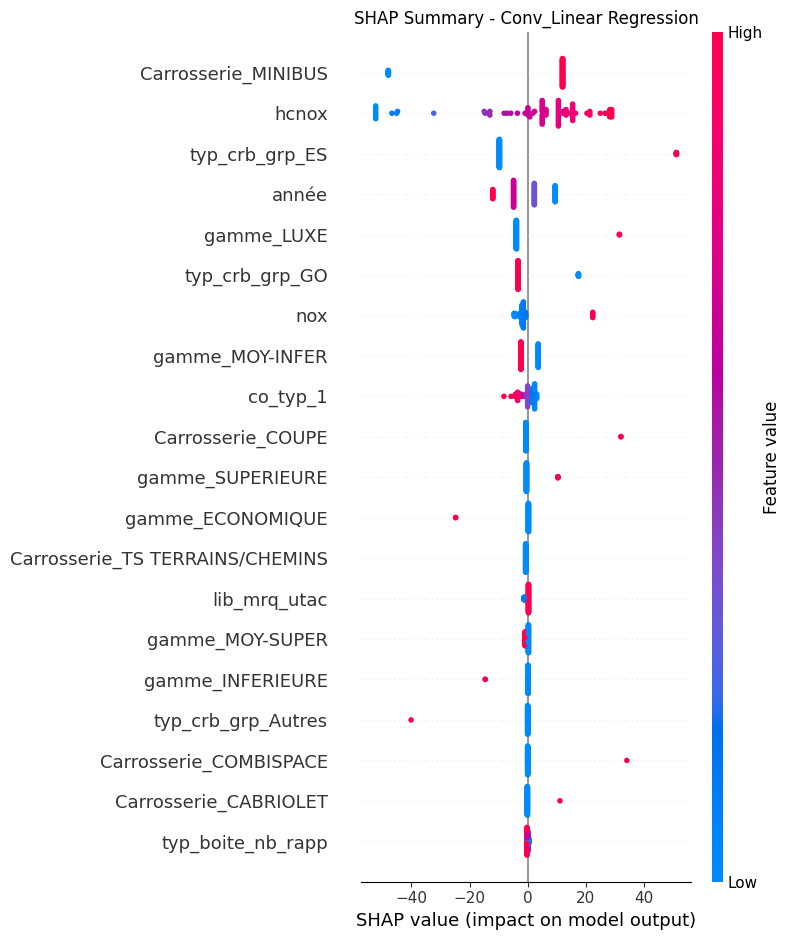


Top 10 Features par SHAP Value (Conv_Linear Regression):
               Feature  SHAP_Value
0  Carrosserie_MINIBUS   17.375349
1                hcnox   16.772236
2       typ_crb_grp_ES   13.050558
3                année    6.047642
4           gamme_LUXE    4.729230
5       typ_crb_grp_GO    4.594144
6                  nox    3.252535
7      gamme_MOY-INFER    2.922255
8             co_typ_1    1.959164
9    Carrosserie_COUPE    1.282760

Running SHAP for Conv_Random Forest Regressor …
SHAP Erreur pour Conv_Random Forest Regressor: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 200.187698, while the model output was 213.605754. If this difference is acceptable you can set check_additivity=False to disable this check.

Running SHAP for Conv_Gr

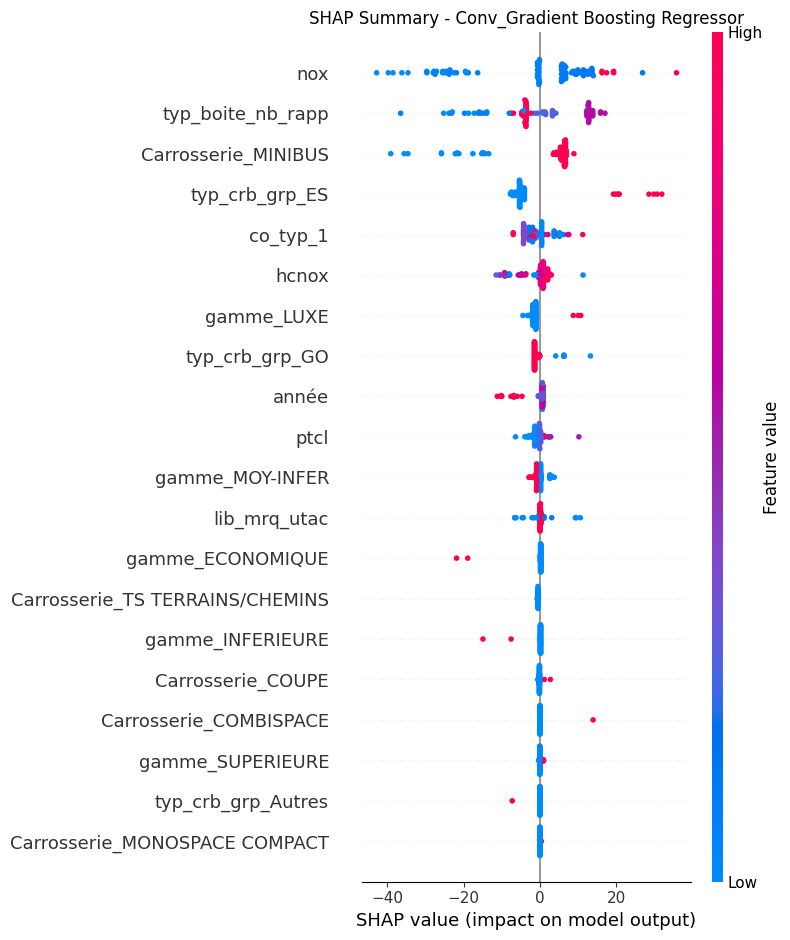


Top 10 Features par SHAP Value (Conv_Gradient Boosting Regressor):
               Feature  SHAP_Value
0                  nox   12.997746
1    typ_boite_nb_rapp    8.690882
2  Carrosserie_MINIBUS    8.498972
3       typ_crb_grp_ES    6.901080
4             co_typ_1    2.607826
5                hcnox    2.273195
6           gamme_LUXE    1.781572
7       typ_crb_grp_GO    1.669184
8                année    1.606637
9                 ptcl    1.067289

Running SHAP for Conv_XGBoost Regressor …


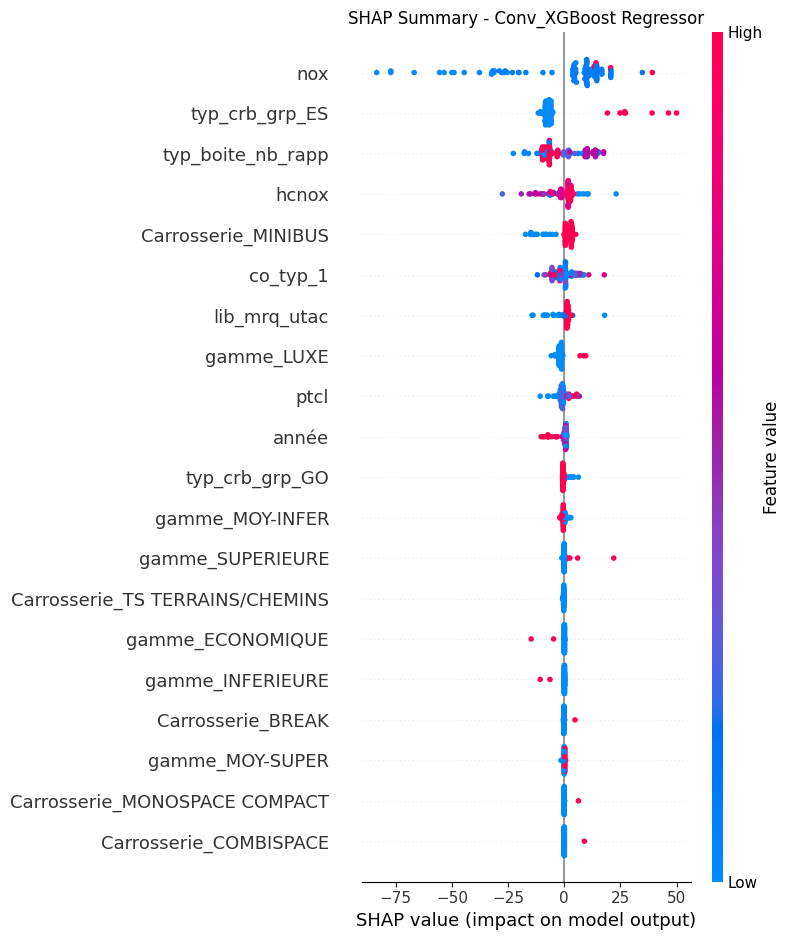


Top 10 Features par SHAP Value (Conv_XGBoost Regressor):
               Feature  SHAP_Value
0                  nox   18.631537
1       typ_crb_grp_ES    9.373758
2    typ_boite_nb_rapp    8.396594
3                hcnox    4.228599
4  Carrosserie_MINIBUS    3.693822
5             co_typ_1    3.583471
6         lib_mrq_utac    2.322826
7           gamme_LUXE    2.079009
8                 ptcl    1.604294
9                année    1.395867

=== SHAP Analysis: GridSearchCV Models ===

Running SHAP for GS_Linear Regression …


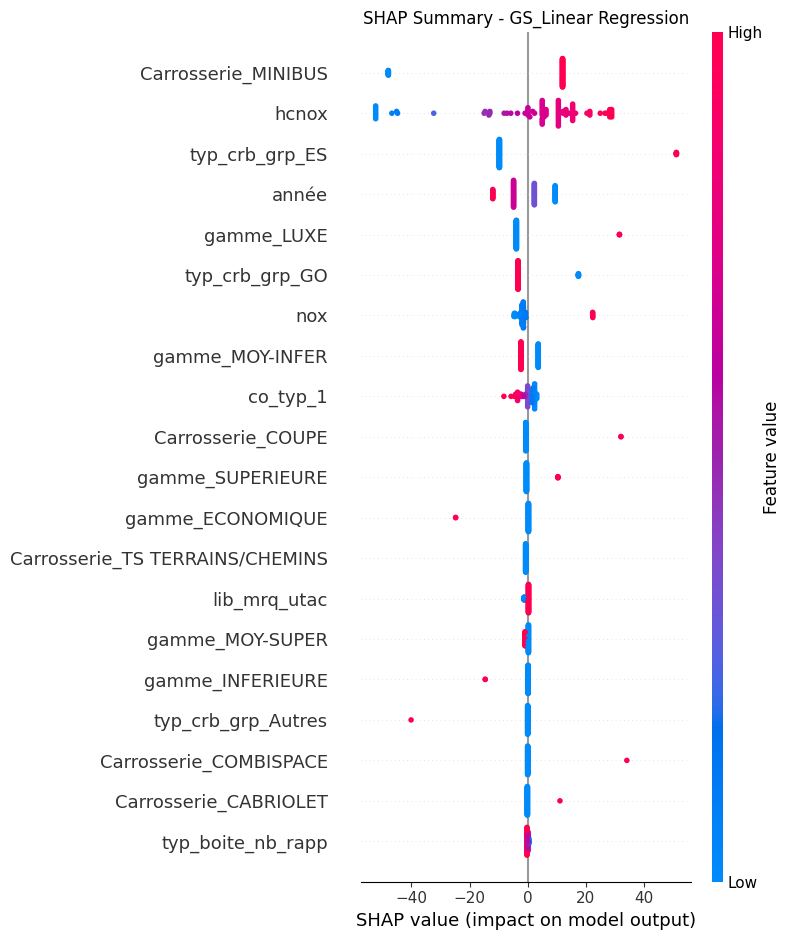


Top 10 Features par SHAP Value (GS_Linear Regression):
               Feature  SHAP_Value
0  Carrosserie_MINIBUS   17.375349
1                hcnox   16.772236
2       typ_crb_grp_ES   13.050558
3                année    6.047642
4           gamme_LUXE    4.729230
5       typ_crb_grp_GO    4.594144
6                  nox    3.252535
7      gamme_MOY-INFER    2.922255
8             co_typ_1    1.959164
9    Carrosserie_COUPE    1.282760

Running SHAP for GS_Random Forest Regressor …
SHAP Erreur pour GS_Random Forest Regressor: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 200.187698, while the model output was 213.605754. If this difference is acceptable you can set check_additivity=False to disable this check.

Running SHAP for GS_Gradient B

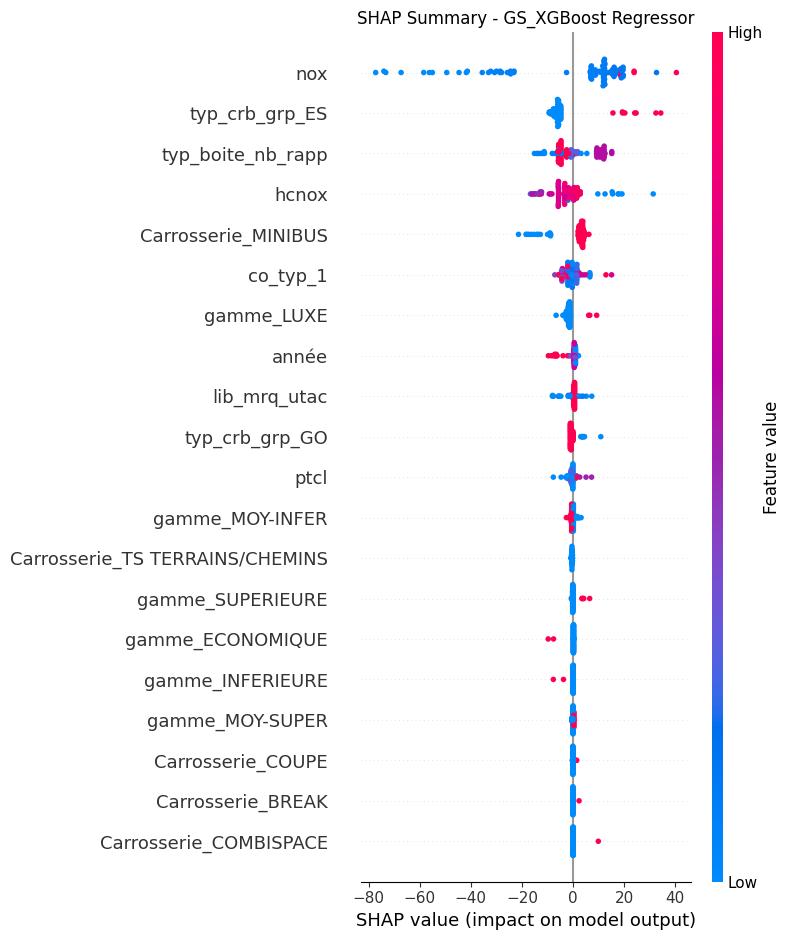


Top 10 Features par SHAP Value (GS_XGBoost Regressor):
               Feature  SHAP_Value
0                  nox   20.655360
1       typ_crb_grp_ES    7.679444
2    typ_boite_nb_rapp    6.516416
3                hcnox    5.245700
4  Carrosserie_MINIBUS    4.851988
5             co_typ_1    2.430640
6           gamme_LUXE    1.991295
7                année    1.397892
8         lib_mrq_utac    1.109896
9       typ_crb_grp_GO    1.055324


In [80]:
# Fonction
def shap_analysis(model, X_data, model_name, sample_size=100):
    try:
        # Explainer adapté
        if isinstance(model, LinearRegression):
            explainer = shap.LinearExplainer(model, X_data)
        elif isinstance(model, (Ridge, Lasso)):
            explainer = shap.LinearExplainer(model, X_data)
        else:
            explainer = shap.Explainer(model, X_data)
        
        # calcul SHAP (on sous-échantillonne en slice)
        shap_values = explainer(X_data.iloc[:sample_size])
        
        # Plot
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, X_data.iloc[:sample_size], show=False)
        plt.title(f'SHAP Summary - {model_name}')
        plt.tight_layout()
        plt.show()
        
        # DataFrame d’importances moyennes
        mean_shap = np.abs(shap_values.values).mean(axis=0)
        shap_df = (
            pd.DataFrame({
                'Feature'   : X_data.columns,
                'SHAP_Value': mean_shap
            })
            .sort_values('SHAP_Value', ascending=False)
            .reset_index(drop=True)
        )
        print(f"\nTop 10 Features par SHAP Value ({model_name}):")
        print(shap_df.head(10))
        return shap_df
        
    except Exception as e:
        print(f"SHAP Erreur pour {model_name}: {e}")
        return None


all_shap = []

# Boucle sur les modèles conventionnels
print("\n=== SHAP Analysis: Conventional Models ===")
for name, mdl in trained_models.items():
    print(f"\nRunning SHAP for Conv_{name} …")
    df_sh = shap_analysis(mdl, X_test, f"Conv_{name}", sample_size=100)
    if df_sh is not None:
        all_shap.append(
            df_sh.assign(Model=name, Model_Type='Conventional')
        )

# Boucle sur les modèles GridSearchCV
print("\n=== SHAP Analysis: GridSearchCV Models ===")
for name, mdl in grid_models.items():
    print(f"\nRunning SHAP for GS_{name} …")
    df_sh = shap_analysis(mdl, X_test, f"GS_{name}", sample_size=100)
    if df_sh is not None:
        all_shap.append(
            df_sh.assign(Model=name, Model_Type='GridSearchCV')
        )


5.4.2 SHAP for the best model

In [ ]:
# 1) Trouver le nom du modèle ayant le plus petit MSE dans grid_search_results
best_mse   = np.inf
best_name  = None

for name, met in grid_search_results.items():
    if met['MSE'] < best_mse:
        best_mse  = met['MSE']
        best_name = name

print(f"\nAnalyse SHAP - Visualisation des prédictions du meilleur modèle: {best_name} (MSE={best_mse:.4f})")

# 2) Récupérer l'objet estimator correspondant
best_model_obj = grid_models[best_name]

# 3) Appel de la fonction SHAP (version corrigée)
import shap
import matplotlib.pyplot as plt

def create_shap_plots_fast(model, X_train, X_test, model_name="", n_samples=2000):
    import shap, matplotlib.pyplot as plt

    X_test_small = X_test.sample(n=min(n_samples, len(X_test)), random_state=0)

    # Explainer unifié, interventional guarantee for trees
    explainer = shap.Explainer(
        model,                 # l’objet modèle lui-même
        X_train,               # fond de référence
        feature_perturbation="interventional"
    )

    # On peut aussi here désactiver l’additivité si besoin
    shap_values = explainer(X_test_small, check_additivity=False)

    # Plots identiques
    plt.figure(figsize=(7,3))
    shap.plots.beeswarm(shap_values, show=False)
    plt.title(f"{model_name} — Beeswarm (n={len(X_test_small)})")
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(7,3))
    shap.plots.bar(shap_values, show=False)
    plt.title(f"{model_name} — Bar plot (n={len(X_test_small)})")
    plt.tight_layout(); plt.show()

    return shap_values

# # Usage
best_model_obj = grid_models[best_name]
shap_vals = create_shap_plots_fast(
    model      = best_model_obj,
    X_train    = X_train,
    X_test     = X_test,
    model_name = f"{best_name}",
    n_samples  = 2000     # peut etre changé mais alourdi le temps de traitement
)

abs_shap = np.abs(shap_vals.values).mean(axis=0)

# Création du DataFrame
df_shap = pd.DataFrame({
    'feature'        : X_test.columns,
    'mean_abs_shap'  : abs_shap
})
# Calcul du pourcentage
df_shap['pct'] = df_shap['mean_abs_shap'] / df_shap['mean_abs_shap'].sum() * 100
# Tri décroissant
df_shap = df_shap.sort_values('pct', ascending=False)

# ── 2) Affichage du top 5 
print("\nTop 5 des features par importance SHAP :")
print(df_shap.head(5).to_string(
    index=False, 
    formatters={'pct': '{:.1f}%'.format}
))

# ── 3) Affichage textuel des 3 premières 
top3 = df_shap.head(3)
print(f"""
Résultats clés :
1. Caractéristique principale :
   - '{top3.iloc[0].feature}' (contribution : {top3.iloc[0].pct:.1f}%)
   - Relation : ⬇️ {top3.iloc[0].feature} → ⬇️ CO₂ | ⬆️ {top3.iloc[0].feature} → ⬆️ CO₂

2. Autres caractéristiques influentes :
   - {top3.iloc[1].feature} ({top3.iloc[1].pct:.1f}%)
   - {top3.iloc[2].feature} ({top3.iloc[2].pct:.1f}%)

3. Interpretation :
   Pour ce projet d'émission de CO₂, il est suffisant de se concentrer sur l'analyse SHAP du meilleur modèle.\nLes variables qui influencent le plus le C02 sont mises en avant dans le meilleur modèle."

   Dans le contexte des émissions de CO2 des voitures, ces graphiques nous aident à comprendre quelles caractéristiques
   (caractéristiques ou paramètres de la voiture) ont le plus grand impact sur les émissions de CO2 prédites par le modèle Random Forest.

   Le 'nox' est de loin le facteur le plus influent sur les émissions de CO2, avec une relation positive claire (plus de 'nox' = plus de CO2). 
   Les spécifications du moteur et le nombre de rapports de boîte sont également des variables clés impactant significativement les émissions.
   """)


Analyse SHAP - Visualisation des prédictions du meilleur modèle: Random Forest Regressor (MSE=37.0490)


 78%|================    | 1570/2000 [01:35<00:26]       

Etape 6 : Classification de l'efficacité des émissions de CO2 selon le barème ACRISS

6.1 Définition des classes d'efficacité

In [ ]:
# 1) On défini les classes d'efficatité pour les émissions de CO2 basées sur les catégories ACRISS
co2_bins = [0, 0.001, 50, 75, 95, 130, 225, np.inf]
co2_labels = ['A+', 'A', 'B', 'C', 'D', 'E', 'F']
df_final_ml['co2_efficiency_class'] = pd.cut(
    df_final_ml['co2'],
    bins=co2_bins,
    labels=co2_labels,
    right=True,
    include_lowest=True
)

5.2 Définition de la variable cible et traitement des NaN

In [ ]:
# 2) Construction de X et y, suppression des NaN
X = df_final_ml.drop(['co2','co2_efficiency_class'], axis=1)
y = df_final_ml['co2_efficiency_class']
mask = y.notna()
X = X.loc[mask].reset_index(drop=True)
y = y.loc[mask].reset_index(drop=True)

5.3 Séparation du jeu d'entraiment et de test

In [ ]:
# 3) Train/Test split avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

5.4 Encodage / Transformation

In [ ]:
# 4) Encodage des labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

In [ ]:
# 5) Colonnes à transformer dynamiquement
all_cols   = X_train.columns.tolist()
ohe_basic  = [c for c in ["Carrosserie", "gamme"] if c in all_cols]
freq_cols  = [c for c in ["lib_mrq_utac","typ_boite_nb_rapp"] if c in all_cols]
fuel_col   = [c for c in ["typ_crb"] if c in all_cols] # This will be ['typ_crb']
exclude    = ohe_basic + freq_cols + fuel_col
num_cols   = [c for c in all_cols
              if c not in exclude
              and X_train[c].dtype in ("int64","float64")]

# FIX: Define a custom transformer for the fuel grouping
class FuelGrouper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.categories_ = ["GO", "ES", "Autres"] # Explicitly define the categories for OHE

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Ensure X is a DataFrame and extract the 'typ_crb' column
        if isinstance(X, pd.DataFrame):
            # If X is a DataFrame, ensure we operate on the correct column
            # and return a DataFrame for the next step in the pipeline.
            transformed_col = X["typ_crb"].map(lambda x: x if x in ["GO","ES"] else "Autres").to_frame(name="typ_crb_grouped")
        else:
            # If X is a numpy array (e.g., from ColumnTransformer),
            # it will be a single column. We assume 'typ_crb' is that column.
            # Convert to Series, apply mapping, and then to DataFrame.
            # This handles cases where ColumnTransformer passes a numpy array
            # for a single column.
            transformed_col = pd.Series(X.flatten()).map(lambda x: x if x in ["GO","ES"] else "Autres").to_frame(name="typ_crb_grouped")

        return transformed_col

    def get_feature_names_out(self, input_features=None):
        # This method is crucial. It tells ColumnTransformer what output names to expect.
        # Since this transformer outputs a single column 'typ_crb_grouped', we specify that.
        return np.array(["typ_crb_grouped"])

In [ ]:
# 6) Pipeline spécifiquement pour le carburant
crb_pipe = Pipeline([
    ("grouper", FuelGrouper()), # Use the custom transformer here
    ("ohe",     OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

In [ ]:
# 7) ColumnTransformer global
transformers = []
if ohe_basic:
    transformers.append((
        "ohe_basic",
        OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"),
        ohe_basic
    ))
if freq_cols:
    transformers.append((
        "ordinal_freq",
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
        freq_cols
    ))
if fuel_col:
    transformers.append(("ohe_crb", crb_pipe, fuel_col))
if num_cols:
    transformers.append(("scaler", StandardScaler(), num_cols))

preprocessor = ColumnTransformer(transformers, remainder="drop", verbose_feature_names_out=True) # Set to True for clearer debugging

In [ ]:
# 8) Dictionnaire des modèles & grilles
models_and_grids = {
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {
            "clf__max_depth": [None, 3, 5, 10],
            "clf__min_samples_split": [2, 5, 10],
            "clf__criterion": ["gini","entropy"]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            "clf__n_estimators": [50, 100],
            "clf__max_depth": [None, 5, 10],
            "clf__min_samples_leaf": [1, 2]
        }
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "clf__n_estimators": [100, 200],
            "clf__learning_rate": [0.05, 0.1],
            "clf__max_depth": [3, 5]
        }
    )
}

5.5 Sélection et entrainement des modèles

In [ ]:
# 9) Boucle d'entraînement / évaluation / sauvegarde

#Choix du dossier pour l'enregistrement des modèles de régression
# --- Préparation à la sauvegarde (à exécuter une seule fois avant la boucle) ---
output_dir_clf = "saved_models_classification"
os.makedirs(output_dir_clf, exist_ok=True)
print(f"Dossier de sauvegarde '{output_dir_clf}' prêt.")


# 1. Le LabelEncoder (pour convertir les prédictions numériques en labels A+, A, B...)
with open(os.path.join(output_dir_clf, "clf_label_encoder.pkl"), "wb") as f:
    pickle.dump(le, f)
print("LabelEncoder sauvegardé.")

# 2. Le Preprocessor (ColumnTransformer) qui gère tout l'encodage et la standardisation
with open(os.path.join(output_dir_clf, "clf_preprocessor.pkl"), "wb") as f:
    pickle.dump(preprocessor, f)
print("Preprocessor (ColumnTransformer) sauvegardé.")

# 3. La liste des colonnes attendues par le preprocessor
X_train_cols = X_train.columns.tolist()
with open(os.path.join(output_dir_clf, "clf_X_train_columns.pkl"), "wb") as f:
    pickle.dump(X_train_cols, f)
print("Liste des colonnes d'entraînement sauvegardée.")


# Initialisation des listes et variables de suivi
results = []
best_overall_pipeline = None
best_overall_acc = 0
# Dictionnaire pour stocker les meilleurs hyperparamètres
best_hyperparams_clf = {}

# Boucle principale sur chaque type de modèle
for name, (clf, grid) in models_and_grids.items():
    
    # ==================================================================
    # 1. MODÈLE STANDARD (PARAMÈTRES PAR DÉFAUT)
    # ==================================================================
    print(f"\n{'='*40}\n{name} - Modèle standard\n{'='*40}")

    # Création et entraînement du pipeline standard
    pipe_std = Pipeline([
        ("preproc", preprocessor),
        ("clf", clf.__class__(**clf.get_params()))
    ])
    pipe_std.fit(X_train, y_train_enc)

    # --- SAUVEGARDE DU MODÈLE STANDARD ---
    filename_std = f"clf_conventionnel_{name.replace(' ', '_').lower()}.pkl"
    with open(os.path.join(output_dir_clf, filename_std), "wb") as f:
        pickle.dump(pipe_std, f)
    print(f"✅ Modèle standard '{name}' sauvegardé dans : {filename_std}")
    # ------------------------------------

    # Évaluation du modèle
    y_pred_std = pipe_std.predict(X_test)
    acc_std = accuracy_score(y_test_enc, y_pred_std)
    f1_std = f1_score(y_test_enc, y_pred_std, average="weighted")

    results.append({
        "Modèle": f"{name} (standard)",
        "Meilleurs params": "default",
        "Accuracy": f"{acc_std:.2%}",
        "F1-weighted": f"{f1_std:.2%}"
    })

    # Mise à jour du meilleur modèle global
    if acc_std > best_overall_acc:
        best_overall_acc = acc_std
        best_overall_pipeline = pipe_std

    # Affichage des rapports et graphiques
    print(classification_report(y_test_enc, y_pred_std, target_names=le.classes_))
    disp = ConfusionMatrixDisplay.from_estimator(
        pipe_std, X_test, y_test_enc,
        display_labels=le.classes_, cmap="Blues", normalize=None
    )
    plt.title(f"{name} (standard) - Confusion matrix")
    plt.show()

    # Affichage de l'importance des features
    step_clf_std = pipe_std.named_steps['clf']
    if hasattr(step_clf_std, "feature_importances_"):
        feature_names = pipe_std.named_steps['preproc'].get_feature_names_out()
        importances = step_clf_std.feature_importances_

        feat_imp_df = pd.DataFrame({
            "Feature": feature_names,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False)
        
        top_n = min(20, len(feat_imp_df))
        plt.figure(figsize=(10, 6))
        plt.barh(
            feat_imp_df["Feature"].iloc[:top_n][::-1],
            feat_imp_df["Importance"].iloc[:top_n][::-1],
            color="skyblue"
        )
        plt.xlabel("Importance")
        plt.title(f"{name} (standard) - Top {top_n} Feature Importances")
        plt.tight_layout()
        plt.show()
    else:
        print(f"--> Pas d'importances disponibles pour {name} (standard).")

    # ==================================================================
    # 2. MODÈLE OPTIMISÉ (GRIDSEARCHCV)
    # ==================================================================
    print(f"\n{'='*40}\n{name} - GridSearch\n{'='*40}")
    
    # Création du pipeline pour GridSearchCV
    pipe = Pipeline([
        ("preproc", preprocessor),
        ("clf",      clf)
    ])
    
    # Exécution de la recherche d'hyperparamètres
    gs = GridSearchCV(
        pipe, grid,
        cv=5, scoring="accuracy",
        n_jobs=-1, error_score="raise"
    )
    gs.fit(X_train, y_train_enc)
    
    best = gs.best_estimator_

    # --- SAUVEGARDE DU MODÈLE GRIDSEARCH ---
    filename_gs = f"clf_gridsearch_{name.replace(' ', '_').lower()}.pkl"
    with open(os.path.join(output_dir_clf, filename_gs), "wb") as f:
        pickle.dump(best, f)
    print(f"✅ Modèle GridSearchCV '{name}' sauvegardé dans : {filename_gs}")
    
    # --- SAUVEGARDE DES MEILLEURS HYPERPARAMÈTRES ---
    best_hyperparams_clf[name] = gs.best_params_
    # ---------------------------------------

    # Évaluation du meilleur modèle trouvé par GridSearch
    y_pred = best.predict(X_test)
    acc    = accuracy_score(y_test_enc, y_pred)
    f1     = f1_score(y_test_enc, y_pred, average="weighted")

    results.append({
        "Modèle": f"{name} (GridSearch)",
        "Meilleurs params": str(gs.best_params_),
        "Accuracy": f"{acc:.2%}",
        "F1-weighted": f"{f1:.2%}"
    })

    # Mise à jour du meilleur modèle global
    if acc > best_overall_acc:
        best_overall_acc = acc
        best_overall_pipeline = best

    # Affichage des rapports et graphiques
    print("Meilleurs Paramètres:", gs.best_params_)
    print(classification_report(y_test_enc, y_pred, target_names=le.classes_))
    disp = ConfusionMatrixDisplay.from_estimator(
        best, X_test, y_test_enc,
        display_labels=le.classes_, cmap="Blues", normalize=None
    )
    plt.title(f"{name} (GridSearch) - Confusion matrix")
    plt.show()

    # Affichage de l'importance des features pour le meilleur modèle
    step_clf = best.named_steps['clf']
    if hasattr(step_clf, "feature_importances_"):
        feature_names = best.named_steps['preproc'].get_feature_names_out()
        importances = step_clf.feature_importances_

        feat_imp_df = pd.DataFrame({
            "Feature": feature_names,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False)
        
        top_n = min(20, len(feat_imp_df))
        plt.figure(figsize=(10, 6))
        plt.barh(
            feat_imp_df["Feature"].iloc[:top_n][::-1],
            feat_imp_df["Importance"].iloc[:top_n][::-1],
            color="mediumseagreen"
        )
        plt.xlabel("Importance")
        plt.title(f"{name} (GridSearch) - Top {top_n} Feature Importances")
        plt.tight_layout()
        plt.show()
    else:
        print(f"--> Pas d'importances disponibles pour {name} (GridSearch).")


# ==================================================================
# SAUVEGARDE DES HYPERPARAMÈTRES DÉTAILLÉS AVEC MÉTRIQUES
# ==================================================================
print("\n--- Sauvegarde des hyperparamètres détaillés ---")

# Création du DataFrame avec les hyperparamètres et métriques
detailed_hyperparams_data_clf = []
for model_name, params in best_hyperparams_clf.items():
    # Récupération des métriques pour ce modèle (GridSearch uniquement)
    gridsearch_result = next((r for r in results if r["Modèle"] == f"{model_name} (GridSearch)"), None)
    
    if gridsearch_result and params:  # Si le modèle a des hyperparamètres optimisés
        for param_name, param_value in params.items():
            detailed_hyperparams_data_clf.append({
                'Model': model_name,
                'Parameter': param_name,
                'Best_Value': param_value,
                'Accuracy': gridsearch_result['Accuracy'],
                'F1_weighted': gridsearch_result['F1-weighted']
            })
    elif gridsearch_result:
        detailed_hyperparams_data_clf.append({
            'Model': model_name,
            'Parameter': 'No hyperparameters',
            'Best_Value': 'Default',
            'Accuracy': gridsearch_result['Accuracy'],
            'F1_weighted': gridsearch_result['F1-weighted']
        })

df_detailed_hyperparams_clf = pd.DataFrame(detailed_hyperparams_data_clf)
detailed_hyperparams_filename_clf = "best_hyperparameters_classification_with_metrics.csv"
df_detailed_hyperparams_clf.to_csv(os.path.join(output_dir_clf, detailed_hyperparams_filename_clf), index=False)
print(f"✅ Hyperparamètres détaillés de classification avec métriques sauvegardés : {detailed_hyperparams_filename_clf}")

# Affichage du tableau des hyperparamètres détaillés
print("\n=== Meilleurs Hyperparamètres de Classification avec Métriques ===")
print(df_detailed_hyperparams_clf)


# ==================================================================
# FINALISATION ET SAUVEGARDE DES RÉSULTATS
# ==================================================================

# Affichage et sauvegarde du meilleur modèle global
print(f"\n🏆 Meilleur modèle global trouvé : Accuracy = {best_overall_acc:.2%}")
if best_overall_pipeline is not None:
    filename_best = "clf_best_overall_pipeline.pkl"
    with open(os.path.join(output_dir_clf, filename_best), "wb") as f:
        pickle.dump(best_overall_pipeline, f)
    print(f"✅ Meilleur pipeline global sauvegardé dans : {filename_best}")

# Création et sauvegarde du tableau récapitulatif des performances
df_res = pd.DataFrame(results).sort_values("Accuracy", ascending=False).reset_index(drop=True)
results_filename = "classification_model_performance.csv"
df_res.to_csv(os.path.join(output_dir_clf, results_filename), index=False)
print(f"✅ Tableau récapitulatif sauvegardé dans : {results_filename}")

print("\n=== Synthèse des Performances de Classification ===")
display(df_res)


In [ ]:
# 11) Visualisation de la distribution des véhicules par classe d'efficacité CO2 à partir des prédictions du meilleur modèle global

# On vérifie que le meilleur modèle a été sauvegardé
try:
    best_overall_pipeline
except NameError:
    raise NameError("La variable 'best_overall_pipeline' n'existe pas. "
                    "Assurez-vous de l'avoir définie dans la boucle d'évaluation.")

# Prédiction sur l'ensemble des données (df_final_ml).
# On reconstruit X_final de la même façon que pour l'entraînement (en excluant les colonnes cibles)
X_full = df_final_ml.drop(['co2', 'co2_efficiency_class'], axis=1)
preds = best_overall_pipeline.predict(X_full)
# Comme en entraînement, les labels ont été encodés avec LabelEncoder "le"
pred_labels = le.inverse_transform(preds)
# Ajout des prédictions dans le df_final_ml (si vous souhaitez comparer avec la classification d'image ou la valeur réelle)
df_final_ml['predicted_co2_class'] = pred_labels

# Calcul des pourcentages pour chaque classe prédites par le meilleur modèle
pred_class_percentages = df_final_ml['predicted_co2_class'].value_counts(normalize=True).reset_index()
pred_class_percentages.columns = ['CO2_Class', 'Percentage']

# On définit l'ordre des classes et la palette de couleurs (comme précédemment)
class_order = ['A+', 'A', 'B', 'C', 'D', 'E', 'F']
color_map = {
    'A+': 'rgb(0, 150, 64)', 'A': 'rgb(100, 190, 73)', 'B': 'rgb(170, 205, 57)',
    'C': 'rgb(255, 230, 0)', 'D': 'rgb(255, 150, 0)', 'E': 'rgb(255, 80, 0)',
    'F': 'rgb(220, 0, 0)'
}

# On reformate les données : toutes les classes doivent être présentes
percentage_data = pred_class_percentages.set_index('CO2_Class')['Percentage'].reindex(class_order, fill_value=0)

# --- Définition des formes et des annotations pour l'aspect « énergie » ---

shapes = [
    # Band F (y=0 à 1)
    go.layout.Shape(type="path", path=" M 0,0 L 4,0 L 3.5,1 L 0,1 Z", fillcolor=color_map['F'], line=dict(color='white', width=1)),
    # Band E (y=1 à 2)
    go.layout.Shape(type="path", path=" M 0,1 L 3.5,1 L 3,2 L 0,2 Z", fillcolor=color_map['E'], line=dict(color='white', width=1)),
    # Band D (y=2 à 3)
    go.layout.Shape(type="path", path=" M 0,2 L 3,2 L 2.5,3 L 0,3 Z", fillcolor=color_map['D'], line=dict(color='white', width=1)),
    # Band C (y=3 à 4)
    go.layout.Shape(type="path", path=" M 0,3 L 2.5,3 L 2,4 L 0,4 Z", fillcolor=color_map['C'], line=dict(color='white', width=1)),
    # Band B (y=4 à 5)
    go.layout.Shape(type="path", path=" M 0,4 L 2,4 L 1.5,5 L 0,5 Z", fillcolor=color_map['B'], line=dict(color='white', width=1)),
    # Band A (y=5 à 6)
    go.layout.Shape(type="path", path=" M 0,5 L 1.5,5 L 1,6 L 0,6 Z", fillcolor=color_map['A'], line=dict(color='white', width=1)),
    # Band A+ (y=6 à 7)
    go.layout.Shape(type="path", path=" M 0,6 L 1,6 L 1,7 L 0,7 Z", fillcolor=color_map['A+'], line=dict(color='white', width=1)),
]

annotations = []
# Annotations des lettres (positionnement à adapter si besoin)
letter_annotation_data = {
    'A+': (0.5, 6.5), 'A': (0.75, 5.5), 'B': (1, 4.5), 'C': (1.25, 3.5),
    'D': (1.5, 2.5), 'E': (1.75, 1.5), 'F': (2, 0.5),
}
for cls, pos in letter_annotation_data.items():
    annotations.append(
        go.layout.Annotation(
            x=pos[0], y=pos[1], text=cls, showarrow=False,
            font=dict(color='black', size=20, weight='bold'),
            xanchor='center', yanchor='middle'
        )
    )

# Annotations des pourcentages (affichées à droite)
percentage_annotation_data = {
    'A+': (4.5, 6.5), 'A': (4.5, 5.5), 'B': (4.5, 4.5), 'C': (4.5, 3.5),
    'D': (4.5, 2.5), 'E': (4.5, 1.5), 'F': (4.5, 0.5),
}
for cls in class_order:
    percentage = percentage_data.get(cls, 0)
    pos = percentage_annotation_data[cls]
    annotations.append(
        go.layout.Annotation(
            x=pos[0], y=pos[1], text=f'{percentage:.1%}', showarrow=False,
            font=dict(color='black', size=12),
            xanchor='left', yanchor='middle'
        )
    )

# Création de la figure
fig = go.Figure()

# Ajout des formes et des annotations à la mise en page
fig.update_layout(shapes=shapes, annotations=annotations)
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[0, 6]),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[0, 7.2]),
    title="Distribution des classes CO2 (Prédictions du meilleur modèle)",
    title_x=0.5,
    showlegend=False,
    height=450,
    width=650,
    margin=dict(l=10, r=10, t=40, b=10),
    plot_bgcolor='white'
)
fig.show()

print ("Notre meilleur modèle prédit la classe CO2 de tout le dataset puis affiche la distribution en (%)\n de ces classes prédites avec une visualisation façon barème ACRISS")